In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
3042,3279,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.12,0.77,0.96,...,249.0,2399.0,809.0,28.89,0.95,1.30,53.30,5.31,44.57,Paddy/G.gram
3043,3280,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,7.55,0.15,0.53,...,86.0,1569.0,381.0,10.60,1.16,0.67,60.11,3.33,16.73,Paddy/G.gram
3044,3281,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.85,4.60,0.57,...,365.0,2299.0,1463.0,533.83,0.75,2.19,23.86,2.98,25.16,Paddy/G.gram
3045,3282,18.40,84.11,Srikakulam,Polaki,Ambeerupeta,Black soil,8.25,1.46,0.57,...,610.0,2226.0,608.0,128.32,2.02,1.30,9.95,2.21,7.01,Paddy/G.gram
3046,3283,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.70,0.69,0.63,...,111.0,1214.0,360.0,12.07,2.01,0.55,70.84,3.23,20.62,Paddy/G.gram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,6.969732,0.401544,0.459620,14.326152,151.297539,1050.501119,359.342282,30.909911,1.241275,0.967964,54.471991,2.292148,27.669508
std,1.173247,0.718111,0.252525,22.816301,171.347465,742.395574,281.079472,70.915372,1.337278,0.622145,57.045416,1.493330,23.305768
min,4.150000,0.020000,0.020000,0.450000,16.000000,46.000000,4.000000,0.100000,0.100000,0.100000,2.580000,0.110000,1.650000
25%,5.950000,0.130000,0.270000,4.615000,67.000000,616.000000,168.500000,5.595000,0.600000,0.505000,9.935000,1.170000,12.980000
50%,6.980000,0.200000,0.420000,9.720000,104.000000,895.000000,285.000000,10.880000,0.900000,0.820000,33.380000,1.940000,20.340000
75%,8.080000,0.360000,0.600000,17.635000,177.000000,1215.000000,464.500000,20.880000,1.500000,1.305000,84.480000,3.120000,34.375000
max,9.040000,9.250000,2.260000,361.940000,2009.000000,5411.000000,1956.000000,648.540000,21.140000,3.660000,346.180000,9.520000,207.680000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 294,
 'Black Soil': 82,
 'Sandy Loam Soil': 59,
 'Saline Soil': 10,
 'Red Sandy Soil': 2}

<BarContainer object of 5 artists>

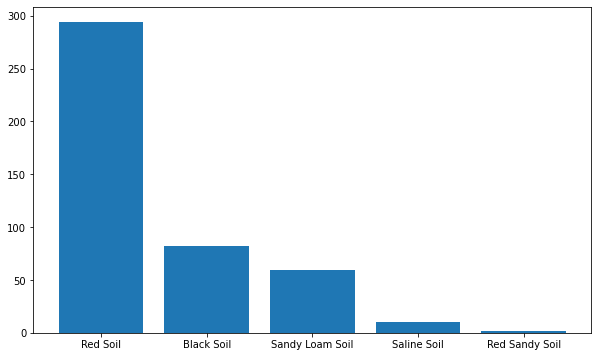

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', ' ', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               59
Maize               40
Coconut             38
banana/coconut      36
Cashew              20
Banana/coconut      17
Banana              11
Maize/paddy          7
paddy                7
Paddy/G.nut          5
maize                5
Paddy Maize          4
Paddy/Ragi           3
Paddy Sugercane      3
banana               3
Cotton/Maize         3
Paddy/Maize          2
cashew               1
coconut/banana       1
paddy                1
Chilli Papaya        1
coconut              1
                     1
Maize/Horti          1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 78
Banana + Coconut      54
Maize                 49
Coconut               39
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

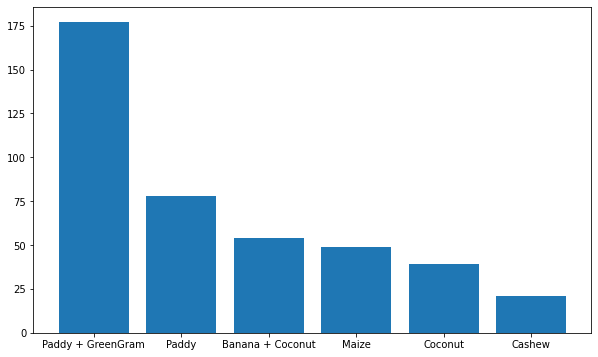

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.034492,-0.173944,0.139470,0.208921,0.102256,0.246669,0.002619,0.047751,0.385637,-0.700318,-0.378362,-0.355628
EC,0.034492,1.000000,0.292624,0.106245,0.278486,0.251430,0.333296,0.761586,0.080673,0.392758,-0.045499,0.175702,-0.082689
OC,-0.173944,0.292624,1.000000,0.425777,0.484595,0.521963,0.430736,0.247832,0.506473,0.467482,0.383583,0.688125,0.204073
P,0.139470,0.106245,0.425777,1.000000,0.642979,0.146191,0.045911,0.071996,0.584419,0.228328,0.007922,0.059528,-0.047723
K,0.208921,0.278486,0.484595,0.642979,1.000000,0.336618,0.289328,0.189886,0.408325,0.420456,-0.102922,0.161548,-0.021776
Ca,0.102256,0.251430,0.521963,0.146191,0.336618,1.000000,0.848609,0.178897,0.193124,0.321091,0.128591,0.571778,0.136686
Mg,0.246669,0.333296,0.430736,0.045911,0.289328,0.848609,1.000000,0.218454,0.058385,0.573423,-0.013518,0.508615,0.043985
S,0.002619,0.761586,0.247832,0.071996,0.189886,0.178897,0.218454,1.000000,0.036845,0.418466,0.037770,0.168004,-0.087807
Zn,0.047751,0.080673,0.506473,0.584419,0.408325,0.193124,0.058385,0.036845,1.000000,0.140311,0.107751,0.177357,0.145566
B,0.385637,0.392758,0.467482,0.228328,0.420456,0.321091,0.573423,0.418466,0.140311,1.000000,-0.149562,0.341294,-0.145286


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe     Mn  Black Soil  Red Sandy Soil  \
3042  6.12  0.77  0.96  5.62  53.3  44.57           1               0   

      Red Soil  Saline Soil  Sandy Loam Soil  
3042         0            0                0  
3042    Paddy + GreenGram
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6571428571428571


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.39 %
Standard Deviation: 6.29 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.580952380952381


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 56.85 %
Standard Deviation: 7.68 %


# Random Forest Classifier

In [46]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7428571428571429


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.49 %
Standard Deviation: 3.73 %


In [50]:
pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [51]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [52]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [53]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6857142857142857


In [54]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [55]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.98 %
Standard Deviation: 5.32 %


# Multi-layer Perceptron Classifier

In [41]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [42]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7795527156549521
Testing Accuracy:  0.6666666666666666


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.25 %
Standard Deviation: 4.88 %


# Catboost

In [45]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.3593898	total: 130ms	remaining: 12.8s
1:	learn: 1.1638211	total: 130ms	remaining: 6.38s
2:	learn: 0.9990551	total: 131ms	remaining: 4.23s
3:	learn: 0.9796896	total: 131ms	remaining: 3.15s
4:	learn: 0.9102774	total: 132ms	remaining: 2.51s
5:	learn: 0.8506520	total: 133ms	remaining: 2.08s
6:	learn: 0.8206306	total: 133ms	remaining: 1.77s
7:	learn: 0.8044785	total: 134ms	remaining: 1.54s
8:	learn: 0.7694996	total: 135ms	remaining: 1.36s
9:	learn: 0.7427284	total: 135ms	remaining: 1.22s
10:	learn: 0.7279390	total: 136ms	remaining: 1.1s
11:	learn: 0.7117591	total: 136ms	remaining: 999ms
12:	learn: 0.6990791	total: 137ms	remaining: 915ms
13:	learn: 0.6887693	total: 137ms	remaining: 843ms
14:	learn: 0.6675612	total: 138ms	remaining: 781ms
15:	learn: 0.6604553	total: 138ms	remaining: 727ms
16:	learn: 0.6490972	total: 139ms	remaining: 678ms
17:	learn: 0.6359736	total: 139ms	remaining: 635ms
18:	learn: 0.6281226	total: 140ms	remaining: 597ms
19:	learn: 0.6048968	total: 141ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.001099993
bestIteration = 99

Training on fold [1/5]

bestTest = 1.041555595
bestIteration = 99

Training on fold [2/5]

bestTest = 1.053268137
bestIteration = 99

Training on fold [3/5]

bestTest = 1.026563229
bestIteration = 99

Training on fold [4/5]

bestTest = 0.998905537
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7626852	test: 1.7618803	best: 1.7618803 (0)	total: 1.71ms	remaining: 1.71s
1:	learn: 1.7307444	test: 1.7291632	best: 1.7291632 (1)	total: 3.28ms	remaining: 1.64s
2:	learn: 1.6980406	test: 1.6979139	best: 1.6979139 (2)	total: 4.73ms	remaining: 1.57s
3:	learn: 1.6705860	test: 1.6698036	best: 1.6698036 (3)	total: 6.16ms	remaining: 1.53s
4:	learn: 1.6409247	test: 1.6437165	best: 1.6437165 (4)	total: 7.53ms	remaining: 1.5s
5:	learn: 1.6114030	test: 1.6203663	best: 1.6203663 (5)	total: 8.97ms	remaining: 1.49s
6:	learn: 1.5861115	test: 1.5943918	best: 1.5943918 (6)	total: 10.4ms	remaining: 1.48s
7:	learn: 1.5633153	test: 1.5720822	best: 1.5720822 (7)	total: 11.9ms	remaining: 1.48s
8:	learn: 1.5423669	test: 1.5495323	best: 1.5495323 (8)	total: 13.5ms	remaining: 1.48s
9:	learn: 1.5225474	test: 1.5293582	best: 1.5293582 (9)	total: 15.1ms	remaining: 1.5s
10:	learn: 1.5037751	test: 1.5099659	best: 1.5099659 (10)	total: 16.7ms	remaining: 1.5s
11:	learn: 1.4814456	test: 1.4847965	best: 1

109:	learn: 0.8007128	test: 0.9088796	best: 0.9088796 (109)	total: 186ms	remaining: 1.5s
110:	learn: 0.7981509	test: 0.9071703	best: 0.9071703 (110)	total: 188ms	remaining: 1.5s
111:	learn: 0.7946026	test: 0.9076292	best: 0.9071703 (110)	total: 189ms	remaining: 1.5s
112:	learn: 0.7920428	test: 0.9065711	best: 0.9065711 (112)	total: 191ms	remaining: 1.5s
113:	learn: 0.7889820	test: 0.9048186	best: 0.9048186 (113)	total: 193ms	remaining: 1.5s
114:	learn: 0.7863757	test: 0.9040203	best: 0.9040203 (114)	total: 194ms	remaining: 1.5s
115:	learn: 0.7836910	test: 0.9022413	best: 0.9022413 (115)	total: 196ms	remaining: 1.49s
116:	learn: 0.7821703	test: 0.9010556	best: 0.9010556 (116)	total: 198ms	remaining: 1.49s
117:	learn: 0.7792567	test: 0.8994272	best: 0.8994272 (117)	total: 200ms	remaining: 1.49s
118:	learn: 0.7767955	test: 0.8984391	best: 0.8984391 (118)	total: 202ms	remaining: 1.49s
119:	learn: 0.7743745	test: 0.8967396	best: 0.8967396 (119)	total: 204ms	remaining: 1.49s
120:	learn: 0.77

215:	learn: 0.6203696	test: 0.8250428	best: 0.8250428 (215)	total: 353ms	remaining: 1.28s
216:	learn: 0.6197268	test: 0.8252525	best: 0.8250428 (215)	total: 355ms	remaining: 1.28s
217:	learn: 0.6183136	test: 0.8247818	best: 0.8247818 (217)	total: 357ms	remaining: 1.28s
218:	learn: 0.6168493	test: 0.8234001	best: 0.8234001 (218)	total: 358ms	remaining: 1.28s
219:	learn: 0.6159163	test: 0.8233537	best: 0.8233537 (219)	total: 360ms	remaining: 1.27s
220:	learn: 0.6147053	test: 0.8238422	best: 0.8233537 (219)	total: 361ms	remaining: 1.27s
221:	learn: 0.6134752	test: 0.8231593	best: 0.8231593 (221)	total: 363ms	remaining: 1.27s
222:	learn: 0.6124491	test: 0.8229127	best: 0.8229127 (222)	total: 364ms	remaining: 1.27s
223:	learn: 0.6107452	test: 0.8227934	best: 0.8227934 (223)	total: 366ms	remaining: 1.27s
224:	learn: 0.6094893	test: 0.8227768	best: 0.8227768 (224)	total: 368ms	remaining: 1.26s
225:	learn: 0.6080578	test: 0.8223596	best: 0.8223596 (225)	total: 369ms	remaining: 1.26s
226:	learn

322:	learn: 0.5094612	test: 0.8027923	best: 0.8027923 (322)	total: 530ms	remaining: 1.11s
323:	learn: 0.5087187	test: 0.8031211	best: 0.8027923 (322)	total: 532ms	remaining: 1.11s
324:	learn: 0.5073151	test: 0.8030345	best: 0.8027923 (322)	total: 533ms	remaining: 1.11s
325:	learn: 0.5069838	test: 0.8028750	best: 0.8027923 (322)	total: 535ms	remaining: 1.1s
326:	learn: 0.5064050	test: 0.8026320	best: 0.8026320 (326)	total: 536ms	remaining: 1.1s
327:	learn: 0.5058931	test: 0.8025330	best: 0.8025330 (327)	total: 538ms	remaining: 1.1s
328:	learn: 0.5050785	test: 0.8023970	best: 0.8023970 (328)	total: 540ms	remaining: 1.1s
329:	learn: 0.5041438	test: 0.8023661	best: 0.8023661 (329)	total: 542ms	remaining: 1.1s
330:	learn: 0.5031876	test: 0.8019329	best: 0.8019329 (330)	total: 543ms	remaining: 1.1s
331:	learn: 0.5022943	test: 0.8023191	best: 0.8019329 (330)	total: 545ms	remaining: 1.1s
332:	learn: 0.5013423	test: 0.8022224	best: 0.8019329 (330)	total: 547ms	remaining: 1.09s
333:	learn: 0.500

447:	learn: 0.4214413	test: 0.7992751	best: 0.7971811 (398)	total: 716ms	remaining: 882ms
448:	learn: 0.4208077	test: 0.7989643	best: 0.7971811 (398)	total: 718ms	remaining: 881ms
449:	learn: 0.4203609	test: 0.7991908	best: 0.7971811 (398)	total: 722ms	remaining: 882ms
450:	learn: 0.4200074	test: 0.7992321	best: 0.7971811 (398)	total: 728ms	remaining: 886ms
451:	learn: 0.4196185	test: 0.7994378	best: 0.7971811 (398)	total: 736ms	remaining: 892ms
452:	learn: 0.4192612	test: 0.7993295	best: 0.7971811 (398)	total: 738ms	remaining: 891ms
453:	learn: 0.4187356	test: 0.7993095	best: 0.7971811 (398)	total: 739ms	remaining: 889ms
454:	learn: 0.4180364	test: 0.7990199	best: 0.7971811 (398)	total: 741ms	remaining: 887ms
455:	learn: 0.4176944	test: 0.7991801	best: 0.7971811 (398)	total: 742ms	remaining: 885ms
456:	learn: 0.4172449	test: 0.7992248	best: 0.7971811 (398)	total: 744ms	remaining: 884ms
457:	learn: 0.4166133	test: 0.7989507	best: 0.7971811 (398)	total: 745ms	remaining: 882ms
458:	learn

544:	learn: 0.3715666	test: 0.7986970	best: 0.7971811 (398)	total: 884ms	remaining: 738ms
545:	learn: 0.3710403	test: 0.7987859	best: 0.7971811 (398)	total: 886ms	remaining: 737ms
546:	learn: 0.3705912	test: 0.7986900	best: 0.7971811 (398)	total: 888ms	remaining: 735ms
547:	learn: 0.3698027	test: 0.7986444	best: 0.7971811 (398)	total: 889ms	remaining: 733ms
548:	learn: 0.3692369	test: 0.7989515	best: 0.7971811 (398)	total: 891ms	remaining: 732ms
549:	learn: 0.3687306	test: 0.7991760	best: 0.7971811 (398)	total: 892ms	remaining: 730ms
550:	learn: 0.3680917	test: 0.7999227	best: 0.7971811 (398)	total: 894ms	remaining: 729ms
551:	learn: 0.3675709	test: 0.7997123	best: 0.7971811 (398)	total: 896ms	remaining: 727ms
552:	learn: 0.3673323	test: 0.7995063	best: 0.7971811 (398)	total: 898ms	remaining: 725ms
553:	learn: 0.3671021	test: 0.7993711	best: 0.7971811 (398)	total: 899ms	remaining: 724ms
554:	learn: 0.3670395	test: 0.7993209	best: 0.7971811 (398)	total: 901ms	remaining: 722ms
555:	learn

663:	learn: 0.3204392	test: 0.8024679	best: 0.7971811 (398)	total: 1.06s	remaining: 537ms
664:	learn: 0.3199272	test: 0.8022597	best: 0.7971811 (398)	total: 1.06s	remaining: 536ms
665:	learn: 0.3196740	test: 0.8023856	best: 0.7971811 (398)	total: 1.06s	remaining: 534ms
666:	learn: 0.3192495	test: 0.8025746	best: 0.7971811 (398)	total: 1.07s	remaining: 533ms
667:	learn: 0.3189399	test: 0.8027207	best: 0.7971811 (398)	total: 1.07s	remaining: 531ms
668:	learn: 0.3184345	test: 0.8029659	best: 0.7971811 (398)	total: 1.07s	remaining: 529ms
669:	learn: 0.3180971	test: 0.8034027	best: 0.7971811 (398)	total: 1.07s	remaining: 527ms
670:	learn: 0.3177356	test: 0.8034597	best: 0.7971811 (398)	total: 1.07s	remaining: 526ms
671:	learn: 0.3174904	test: 0.8033698	best: 0.7971811 (398)	total: 1.07s	remaining: 524ms
672:	learn: 0.3169689	test: 0.8034931	best: 0.7971811 (398)	total: 1.07s	remaining: 523ms
673:	learn: 0.3166029	test: 0.8037247	best: 0.7971811 (398)	total: 1.08s	remaining: 521ms
674:	learn

790:	learn: 0.2795593	test: 0.8098155	best: 0.7971811 (398)	total: 1.25s	remaining: 330ms
791:	learn: 0.2793287	test: 0.8097085	best: 0.7971811 (398)	total: 1.25s	remaining: 328ms
792:	learn: 0.2791116	test: 0.8090521	best: 0.7971811 (398)	total: 1.25s	remaining: 327ms
793:	learn: 0.2785023	test: 0.8089947	best: 0.7971811 (398)	total: 1.25s	remaining: 325ms
794:	learn: 0.2782098	test: 0.8090526	best: 0.7971811 (398)	total: 1.25s	remaining: 323ms
795:	learn: 0.2778925	test: 0.8090169	best: 0.7971811 (398)	total: 1.25s	remaining: 322ms
796:	learn: 0.2776358	test: 0.8088024	best: 0.7971811 (398)	total: 1.26s	remaining: 320ms
797:	learn: 0.2775149	test: 0.8090940	best: 0.7971811 (398)	total: 1.26s	remaining: 319ms
798:	learn: 0.2769759	test: 0.8093031	best: 0.7971811 (398)	total: 1.26s	remaining: 317ms
799:	learn: 0.2765496	test: 0.8091864	best: 0.7971811 (398)	total: 1.26s	remaining: 315ms
800:	learn: 0.2763618	test: 0.8092415	best: 0.7971811 (398)	total: 1.26s	remaining: 314ms
801:	learn

912:	learn: 0.2465222	test: 0.8172107	best: 0.7971811 (398)	total: 1.42s	remaining: 136ms
913:	learn: 0.2463663	test: 0.8173428	best: 0.7971811 (398)	total: 1.42s	remaining: 134ms
914:	learn: 0.2461831	test: 0.8175337	best: 0.7971811 (398)	total: 1.43s	remaining: 133ms
915:	learn: 0.2459634	test: 0.8173773	best: 0.7971811 (398)	total: 1.43s	remaining: 131ms
916:	learn: 0.2457776	test: 0.8174983	best: 0.7971811 (398)	total: 1.43s	remaining: 129ms
917:	learn: 0.2455866	test: 0.8176149	best: 0.7971811 (398)	total: 1.43s	remaining: 128ms
918:	learn: 0.2450862	test: 0.8170763	best: 0.7971811 (398)	total: 1.43s	remaining: 126ms
919:	learn: 0.2446460	test: 0.8168361	best: 0.7971811 (398)	total: 1.43s	remaining: 125ms
920:	learn: 0.2444395	test: 0.8169808	best: 0.7971811 (398)	total: 1.44s	remaining: 123ms
921:	learn: 0.2442770	test: 0.8171918	best: 0.7971811 (398)	total: 1.44s	remaining: 122ms
922:	learn: 0.2438680	test: 0.8172590	best: 0.7971811 (398)	total: 1.44s	remaining: 120ms
923:	learn

11:	learn: 1.1065069	test: 1.1289814	best: 1.1289814 (11)	total: 32ms	remaining: 2.63s
12:	learn: 1.0766287	test: 1.1027777	best: 1.1027777 (12)	total: 34.2ms	remaining: 2.59s
13:	learn: 1.0526072	test: 1.0771858	best: 1.0771858 (13)	total: 35.7ms	remaining: 2.52s
14:	learn: 1.0318151	test: 1.0590527	best: 1.0590527 (14)	total: 37.3ms	remaining: 2.45s
15:	learn: 1.0090321	test: 1.0390910	best: 1.0390910 (15)	total: 38.9ms	remaining: 2.39s
16:	learn: 0.9889484	test: 1.0216820	best: 1.0216820 (16)	total: 40.6ms	remaining: 2.34s
17:	learn: 0.9714144	test: 1.0061928	best: 1.0061928 (17)	total: 42.2ms	remaining: 2.3s
18:	learn: 0.9520776	test: 0.9966357	best: 0.9966357 (18)	total: 43.8ms	remaining: 2.26s
19:	learn: 0.9335354	test: 0.9837730	best: 0.9837730 (19)	total: 45.6ms	remaining: 2.23s
20:	learn: 0.9163657	test: 0.9688337	best: 0.9688337 (20)	total: 47.3ms	remaining: 2.2s
21:	learn: 0.9023284	test: 0.9539065	best: 0.9539065 (21)	total: 49.2ms	remaining: 2.19s
22:	learn: 0.8919612	test

120:	learn: 0.4403672	test: 0.7649874	best: 0.7632854 (117)	total: 206ms	remaining: 1.49s
121:	learn: 0.4375542	test: 0.7646456	best: 0.7632854 (117)	total: 208ms	remaining: 1.5s
122:	learn: 0.4358568	test: 0.7635469	best: 0.7632854 (117)	total: 209ms	remaining: 1.49s
123:	learn: 0.4339662	test: 0.7639894	best: 0.7632854 (117)	total: 211ms	remaining: 1.49s
124:	learn: 0.4315354	test: 0.7630468	best: 0.7630468 (124)	total: 213ms	remaining: 1.49s
125:	learn: 0.4293555	test: 0.7631225	best: 0.7630468 (124)	total: 215ms	remaining: 1.49s
126:	learn: 0.4278405	test: 0.7632553	best: 0.7630468 (124)	total: 216ms	remaining: 1.49s
127:	learn: 0.4257566	test: 0.7633569	best: 0.7630468 (124)	total: 218ms	remaining: 1.48s
128:	learn: 0.4244975	test: 0.7633797	best: 0.7630468 (124)	total: 219ms	remaining: 1.48s
129:	learn: 0.4230523	test: 0.7632808	best: 0.7630468 (124)	total: 221ms	remaining: 1.48s
130:	learn: 0.4209921	test: 0.7624641	best: 0.7624641 (130)	total: 223ms	remaining: 1.48s
131:	learn:

229:	learn: 0.2850043	test: 0.7692381	best: 0.7578186 (174)	total: 382ms	remaining: 1.28s
230:	learn: 0.2839528	test: 0.7687578	best: 0.7578186 (174)	total: 384ms	remaining: 1.28s
231:	learn: 0.2827711	test: 0.7696020	best: 0.7578186 (174)	total: 385ms	remaining: 1.27s
232:	learn: 0.2812533	test: 0.7707500	best: 0.7578186 (174)	total: 387ms	remaining: 1.27s
233:	learn: 0.2802700	test: 0.7719264	best: 0.7578186 (174)	total: 389ms	remaining: 1.27s
234:	learn: 0.2797722	test: 0.7713782	best: 0.7578186 (174)	total: 390ms	remaining: 1.27s
235:	learn: 0.2791819	test: 0.7712563	best: 0.7578186 (174)	total: 392ms	remaining: 1.27s
236:	learn: 0.2784787	test: 0.7713193	best: 0.7578186 (174)	total: 394ms	remaining: 1.27s
237:	learn: 0.2777711	test: 0.7710043	best: 0.7578186 (174)	total: 395ms	remaining: 1.26s
238:	learn: 0.2761236	test: 0.7710205	best: 0.7578186 (174)	total: 397ms	remaining: 1.26s
239:	learn: 0.2747026	test: 0.7730099	best: 0.7578186 (174)	total: 399ms	remaining: 1.26s
240:	learn

338:	learn: 0.2001619	test: 0.7998979	best: 0.7578186 (174)	total: 559ms	remaining: 1.09s
339:	learn: 0.1992777	test: 0.8007895	best: 0.7578186 (174)	total: 561ms	remaining: 1.09s
340:	learn: 0.1990462	test: 0.8011573	best: 0.7578186 (174)	total: 562ms	remaining: 1.09s
341:	learn: 0.1986847	test: 0.8007720	best: 0.7578186 (174)	total: 564ms	remaining: 1.08s
342:	learn: 0.1979733	test: 0.8022993	best: 0.7578186 (174)	total: 565ms	remaining: 1.08s
343:	learn: 0.1975534	test: 0.8023345	best: 0.7578186 (174)	total: 567ms	remaining: 1.08s
344:	learn: 0.1973550	test: 0.8023964	best: 0.7578186 (174)	total: 569ms	remaining: 1.08s
345:	learn: 0.1967148	test: 0.8029234	best: 0.7578186 (174)	total: 571ms	remaining: 1.08s
346:	learn: 0.1963783	test: 0.8036813	best: 0.7578186 (174)	total: 572ms	remaining: 1.08s
347:	learn: 0.1957979	test: 0.8038926	best: 0.7578186 (174)	total: 574ms	remaining: 1.07s
348:	learn: 0.1946818	test: 0.8049775	best: 0.7578186 (174)	total: 576ms	remaining: 1.07s
349:	learn

443:	learn: 0.1523454	test: 0.8319702	best: 0.7578186 (174)	total: 733ms	remaining: 917ms
444:	learn: 0.1518282	test: 0.8316509	best: 0.7578186 (174)	total: 734ms	remaining: 916ms
445:	learn: 0.1515368	test: 0.8317331	best: 0.7578186 (174)	total: 736ms	remaining: 914ms
446:	learn: 0.1510654	test: 0.8332437	best: 0.7578186 (174)	total: 738ms	remaining: 913ms
447:	learn: 0.1506631	test: 0.8333255	best: 0.7578186 (174)	total: 740ms	remaining: 911ms
448:	learn: 0.1502994	test: 0.8339997	best: 0.7578186 (174)	total: 741ms	remaining: 910ms
449:	learn: 0.1500077	test: 0.8334484	best: 0.7578186 (174)	total: 743ms	remaining: 908ms
450:	learn: 0.1498606	test: 0.8337435	best: 0.7578186 (174)	total: 744ms	remaining: 906ms
451:	learn: 0.1495702	test: 0.8342066	best: 0.7578186 (174)	total: 746ms	remaining: 905ms
452:	learn: 0.1494893	test: 0.8341486	best: 0.7578186 (174)	total: 748ms	remaining: 903ms
453:	learn: 0.1493111	test: 0.8342262	best: 0.7578186 (174)	total: 749ms	remaining: 901ms
454:	learn

552:	learn: 0.1190563	test: 0.8597928	best: 0.7578186 (174)	total: 913ms	remaining: 738ms
553:	learn: 0.1189176	test: 0.8595700	best: 0.7578186 (174)	total: 916ms	remaining: 737ms
554:	learn: 0.1184643	test: 0.8597360	best: 0.7578186 (174)	total: 917ms	remaining: 735ms
555:	learn: 0.1182200	test: 0.8598876	best: 0.7578186 (174)	total: 919ms	remaining: 734ms
556:	learn: 0.1179392	test: 0.8599761	best: 0.7578186 (174)	total: 920ms	remaining: 732ms
557:	learn: 0.1177660	test: 0.8599488	best: 0.7578186 (174)	total: 922ms	remaining: 730ms
558:	learn: 0.1175999	test: 0.8598739	best: 0.7578186 (174)	total: 923ms	remaining: 728ms
559:	learn: 0.1171370	test: 0.8606978	best: 0.7578186 (174)	total: 925ms	remaining: 727ms
560:	learn: 0.1168055	test: 0.8601792	best: 0.7578186 (174)	total: 926ms	remaining: 725ms
561:	learn: 0.1166174	test: 0.8604844	best: 0.7578186 (174)	total: 928ms	remaining: 723ms
562:	learn: 0.1163596	test: 0.8603954	best: 0.7578186 (174)	total: 930ms	remaining: 722ms
563:	learn

667:	learn: 0.0945336	test: 0.8822495	best: 0.7578186 (174)	total: 1.09s	remaining: 544ms
668:	learn: 0.0943401	test: 0.8825634	best: 0.7578186 (174)	total: 1.1s	remaining: 543ms
669:	learn: 0.0940652	test: 0.8829115	best: 0.7578186 (174)	total: 1.1s	remaining: 542ms
670:	learn: 0.0938963	test: 0.8831534	best: 0.7578186 (174)	total: 1.1s	remaining: 540ms
671:	learn: 0.0937468	test: 0.8826045	best: 0.7578186 (174)	total: 1.1s	remaining: 538ms
672:	learn: 0.0934570	test: 0.8832894	best: 0.7578186 (174)	total: 1.1s	remaining: 537ms
673:	learn: 0.0932680	test: 0.8836766	best: 0.7578186 (174)	total: 1.11s	remaining: 535ms
674:	learn: 0.0930559	test: 0.8836666	best: 0.7578186 (174)	total: 1.11s	remaining: 533ms
675:	learn: 0.0928528	test: 0.8835442	best: 0.7578186 (174)	total: 1.11s	remaining: 532ms
676:	learn: 0.0926055	test: 0.8840832	best: 0.7578186 (174)	total: 1.11s	remaining: 530ms
677:	learn: 0.0924053	test: 0.8840698	best: 0.7578186 (174)	total: 1.11s	remaining: 529ms
678:	learn: 0.0

777:	learn: 0.0783556	test: 0.9024007	best: 0.7578186 (174)	total: 1.27s	remaining: 362ms
778:	learn: 0.0782842	test: 0.9027693	best: 0.7578186 (174)	total: 1.27s	remaining: 360ms
779:	learn: 0.0782113	test: 0.9029373	best: 0.7578186 (174)	total: 1.27s	remaining: 359ms
780:	learn: 0.0781359	test: 0.9025553	best: 0.7578186 (174)	total: 1.27s	remaining: 357ms
781:	learn: 0.0780232	test: 0.9021818	best: 0.7578186 (174)	total: 1.27s	remaining: 355ms
782:	learn: 0.0778520	test: 0.9022889	best: 0.7578186 (174)	total: 1.28s	remaining: 354ms
783:	learn: 0.0777694	test: 0.9025196	best: 0.7578186 (174)	total: 1.28s	remaining: 352ms
784:	learn: 0.0776742	test: 0.9029024	best: 0.7578186 (174)	total: 1.28s	remaining: 350ms
785:	learn: 0.0775659	test: 0.9030013	best: 0.7578186 (174)	total: 1.28s	remaining: 349ms
786:	learn: 0.0774308	test: 0.9036311	best: 0.7578186 (174)	total: 1.28s	remaining: 347ms
787:	learn: 0.0773827	test: 0.9040007	best: 0.7578186 (174)	total: 1.28s	remaining: 346ms
788:	learn

888:	learn: 0.0666221	test: 0.9239583	best: 0.7578186 (174)	total: 1.44s	remaining: 180ms
889:	learn: 0.0665801	test: 0.9239856	best: 0.7578186 (174)	total: 1.44s	remaining: 178ms
890:	learn: 0.0665093	test: 0.9244449	best: 0.7578186 (174)	total: 1.44s	remaining: 177ms
891:	learn: 0.0663054	test: 0.9260884	best: 0.7578186 (174)	total: 1.45s	remaining: 175ms
892:	learn: 0.0662475	test: 0.9264748	best: 0.7578186 (174)	total: 1.45s	remaining: 173ms
893:	learn: 0.0661124	test: 0.9266948	best: 0.7578186 (174)	total: 1.45s	remaining: 172ms
894:	learn: 0.0660055	test: 0.9272026	best: 0.7578186 (174)	total: 1.45s	remaining: 170ms
895:	learn: 0.0659308	test: 0.9273688	best: 0.7578186 (174)	total: 1.45s	remaining: 169ms
896:	learn: 0.0658654	test: 0.9272766	best: 0.7578186 (174)	total: 1.45s	remaining: 167ms
897:	learn: 0.0657590	test: 0.9279570	best: 0.7578186 (174)	total: 1.46s	remaining: 165ms
898:	learn: 0.0656072	test: 0.9282486	best: 0.7578186 (174)	total: 1.46s	remaining: 164ms
899:	learn

1:	learn: 1.7415441	test: 1.7446721	best: 1.7446721 (1)	total: 15ms	remaining: 7.48s
2:	learn: 1.7137627	test: 1.7206469	best: 1.7206469 (2)	total: 19.9ms	remaining: 6.62s
3:	learn: 1.6894178	test: 1.7022896	best: 1.7022896 (3)	total: 24.9ms	remaining: 6.21s
4:	learn: 1.6694009	test: 1.6838088	best: 1.6838088 (4)	total: 30.7ms	remaining: 6.11s
5:	learn: 1.6416703	test: 1.6554358	best: 1.6554358 (5)	total: 36.3ms	remaining: 6.02s
6:	learn: 1.6191592	test: 1.6323126	best: 1.6323126 (6)	total: 40.9ms	remaining: 5.81s
7:	learn: 1.5992188	test: 1.6131796	best: 1.6131796 (7)	total: 47.1ms	remaining: 5.83s
8:	learn: 1.5767055	test: 1.5967359	best: 1.5967359 (8)	total: 52.3ms	remaining: 5.76s
9:	learn: 1.5525828	test: 1.5748391	best: 1.5748391 (9)	total: 57.2ms	remaining: 5.66s
10:	learn: 1.5316614	test: 1.5576750	best: 1.5576750 (10)	total: 63.3ms	remaining: 5.69s
11:	learn: 1.5121387	test: 1.5387210	best: 1.5387210 (11)	total: 68.5ms	remaining: 5.64s
12:	learn: 1.4933633	test: 1.5215134	best

116:	learn: 0.7198310	test: 0.9107739	best: 0.9107739 (116)	total: 589ms	remaining: 4.44s
117:	learn: 0.7161551	test: 0.9102572	best: 0.9102572 (117)	total: 595ms	remaining: 4.45s
118:	learn: 0.7138082	test: 0.9090156	best: 0.9090156 (118)	total: 603ms	remaining: 4.46s
119:	learn: 0.7103789	test: 0.9079899	best: 0.9079899 (119)	total: 612ms	remaining: 4.48s
120:	learn: 0.7077829	test: 0.9070926	best: 0.9070926 (120)	total: 620ms	remaining: 4.5s
121:	learn: 0.7045111	test: 0.9060726	best: 0.9060726 (121)	total: 626ms	remaining: 4.5s
122:	learn: 0.7016770	test: 0.9046370	best: 0.9046370 (122)	total: 636ms	remaining: 4.53s
123:	learn: 0.6996419	test: 0.9036460	best: 0.9036460 (123)	total: 642ms	remaining: 4.54s
124:	learn: 0.6965636	test: 0.9014169	best: 0.9014169 (124)	total: 649ms	remaining: 4.54s
125:	learn: 0.6942161	test: 0.8996973	best: 0.8996973 (125)	total: 658ms	remaining: 4.56s
126:	learn: 0.6911356	test: 0.8992360	best: 0.8992360 (126)	total: 667ms	remaining: 4.58s
127:	learn: 

222:	learn: 0.5037693	test: 0.8354406	best: 0.8354406 (222)	total: 1.15s	remaining: 4.01s
223:	learn: 0.5025616	test: 0.8350000	best: 0.8350000 (223)	total: 1.16s	remaining: 4.01s
224:	learn: 0.5012897	test: 0.8344801	best: 0.8344801 (224)	total: 1.16s	remaining: 4.01s
225:	learn: 0.5001994	test: 0.8343577	best: 0.8343577 (225)	total: 1.17s	remaining: 4s
226:	learn: 0.4991646	test: 0.8344880	best: 0.8343577 (225)	total: 1.17s	remaining: 4s
227:	learn: 0.4975531	test: 0.8339122	best: 0.8339122 (227)	total: 1.18s	remaining: 4s
228:	learn: 0.4960380	test: 0.8346405	best: 0.8339122 (227)	total: 1.19s	remaining: 4s
229:	learn: 0.4946614	test: 0.8343720	best: 0.8339122 (227)	total: 1.19s	remaining: 3.99s
230:	learn: 0.4928627	test: 0.8350776	best: 0.8339122 (227)	total: 1.2s	remaining: 3.99s
231:	learn: 0.4919175	test: 0.8349283	best: 0.8339122 (227)	total: 1.2s	remaining: 3.98s
232:	learn: 0.4902378	test: 0.8325434	best: 0.8325434 (232)	total: 1.21s	remaining: 3.98s
233:	learn: 0.4886596	te

329:	learn: 0.3838543	test: 0.8171728	best: 0.8163318 (323)	total: 1.72s	remaining: 3.5s
330:	learn: 0.3831376	test: 0.8174355	best: 0.8163318 (323)	total: 1.74s	remaining: 3.52s
331:	learn: 0.3819675	test: 0.8181918	best: 0.8163318 (323)	total: 1.75s	remaining: 3.52s
332:	learn: 0.3813059	test: 0.8178918	best: 0.8163318 (323)	total: 1.76s	remaining: 3.52s
333:	learn: 0.3808903	test: 0.8181428	best: 0.8163318 (323)	total: 1.76s	remaining: 3.52s
334:	learn: 0.3801360	test: 0.8183787	best: 0.8163318 (323)	total: 1.77s	remaining: 3.51s
335:	learn: 0.3793630	test: 0.8181875	best: 0.8163318 (323)	total: 1.78s	remaining: 3.51s
336:	learn: 0.3786116	test: 0.8185337	best: 0.8163318 (323)	total: 1.78s	remaining: 3.51s
337:	learn: 0.3779505	test: 0.8182579	best: 0.8163318 (323)	total: 1.79s	remaining: 3.5s
338:	learn: 0.3774512	test: 0.8180764	best: 0.8163318 (323)	total: 1.8s	remaining: 3.5s
339:	learn: 0.3765313	test: 0.8176127	best: 0.8163318 (323)	total: 1.8s	remaining: 3.5s
340:	learn: 0.37

421:	learn: 0.3145116	test: 0.8148356	best: 0.8143065 (410)	total: 2.28s	remaining: 3.13s
422:	learn: 0.3141545	test: 0.8146057	best: 0.8143065 (410)	total: 2.29s	remaining: 3.12s
423:	learn: 0.3137510	test: 0.8149294	best: 0.8143065 (410)	total: 2.29s	remaining: 3.12s
424:	learn: 0.3129574	test: 0.8149764	best: 0.8143065 (410)	total: 2.3s	remaining: 3.11s
425:	learn: 0.3124275	test: 0.8152034	best: 0.8143065 (410)	total: 2.3s	remaining: 3.1s
426:	learn: 0.3117060	test: 0.8150445	best: 0.8143065 (410)	total: 2.31s	remaining: 3.1s
427:	learn: 0.3111498	test: 0.8152161	best: 0.8143065 (410)	total: 2.31s	remaining: 3.09s
428:	learn: 0.3106828	test: 0.8145756	best: 0.8143065 (410)	total: 2.32s	remaining: 3.09s
429:	learn: 0.3099706	test: 0.8149842	best: 0.8143065 (410)	total: 2.33s	remaining: 3.08s
430:	learn: 0.3092555	test: 0.8149252	best: 0.8143065 (410)	total: 2.33s	remaining: 3.08s
431:	learn: 0.3087401	test: 0.8147652	best: 0.8143065 (410)	total: 2.34s	remaining: 3.08s
432:	learn: 0.

518:	learn: 0.2626268	test: 0.8159165	best: 0.8132425 (446)	total: 2.83s	remaining: 2.63s
519:	learn: 0.2620391	test: 0.8161307	best: 0.8132425 (446)	total: 2.84s	remaining: 2.62s
520:	learn: 0.2615799	test: 0.8160679	best: 0.8132425 (446)	total: 2.85s	remaining: 2.62s
521:	learn: 0.2611622	test: 0.8160386	best: 0.8132425 (446)	total: 2.85s	remaining: 2.61s
522:	learn: 0.2608422	test: 0.8160106	best: 0.8132425 (446)	total: 2.85s	remaining: 2.6s
523:	learn: 0.2603592	test: 0.8156236	best: 0.8132425 (446)	total: 2.86s	remaining: 2.6s
524:	learn: 0.2600278	test: 0.8154747	best: 0.8132425 (446)	total: 2.87s	remaining: 2.59s
525:	learn: 0.2596378	test: 0.8158090	best: 0.8132425 (446)	total: 2.87s	remaining: 2.59s
526:	learn: 0.2590138	test: 0.8156199	best: 0.8132425 (446)	total: 2.87s	remaining: 2.58s
527:	learn: 0.2586100	test: 0.8157084	best: 0.8132425 (446)	total: 2.88s	remaining: 2.58s
528:	learn: 0.2580391	test: 0.8155036	best: 0.8132425 (446)	total: 2.89s	remaining: 2.57s
529:	learn: 

619:	learn: 0.2204567	test: 0.8194951	best: 0.8132425 (446)	total: 3.38s	remaining: 2.07s
620:	learn: 0.2200659	test: 0.8200117	best: 0.8132425 (446)	total: 3.39s	remaining: 2.07s
621:	learn: 0.2196207	test: 0.8199934	best: 0.8132425 (446)	total: 3.39s	remaining: 2.06s
622:	learn: 0.2191934	test: 0.8198474	best: 0.8132425 (446)	total: 3.4s	remaining: 2.06s
623:	learn: 0.2188516	test: 0.8199296	best: 0.8132425 (446)	total: 3.4s	remaining: 2.05s
624:	learn: 0.2183514	test: 0.8198746	best: 0.8132425 (446)	total: 3.41s	remaining: 2.04s
625:	learn: 0.2180931	test: 0.8203420	best: 0.8132425 (446)	total: 3.42s	remaining: 2.04s
626:	learn: 0.2177770	test: 0.8204718	best: 0.8132425 (446)	total: 3.42s	remaining: 2.03s
627:	learn: 0.2174830	test: 0.8205279	best: 0.8132425 (446)	total: 3.42s	remaining: 2.03s
628:	learn: 0.2172923	test: 0.8206273	best: 0.8132425 (446)	total: 3.43s	remaining: 2.02s
629:	learn: 0.2169681	test: 0.8206819	best: 0.8132425 (446)	total: 3.44s	remaining: 2.02s
630:	learn: 

713:	learn: 0.1905434	test: 0.8257042	best: 0.8132425 (446)	total: 3.93s	remaining: 1.57s
714:	learn: 0.1902346	test: 0.8257335	best: 0.8132425 (446)	total: 3.94s	remaining: 1.57s
715:	learn: 0.1899465	test: 0.8256379	best: 0.8132425 (446)	total: 3.94s	remaining: 1.56s
716:	learn: 0.1895949	test: 0.8258694	best: 0.8132425 (446)	total: 3.95s	remaining: 1.56s
717:	learn: 0.1891437	test: 0.8258466	best: 0.8132425 (446)	total: 3.96s	remaining: 1.55s
718:	learn: 0.1886946	test: 0.8257383	best: 0.8132425 (446)	total: 3.96s	remaining: 1.55s
719:	learn: 0.1883898	test: 0.8260695	best: 0.8132425 (446)	total: 3.97s	remaining: 1.54s
720:	learn: 0.1881582	test: 0.8261846	best: 0.8132425 (446)	total: 3.98s	remaining: 1.54s
721:	learn: 0.1878599	test: 0.8261415	best: 0.8132425 (446)	total: 3.98s	remaining: 1.53s
722:	learn: 0.1875283	test: 0.8262829	best: 0.8132425 (446)	total: 3.99s	remaining: 1.53s
723:	learn: 0.1872931	test: 0.8263000	best: 0.8132425 (446)	total: 4s	remaining: 1.52s
724:	learn: 0

818:	learn: 0.1638616	test: 0.8355566	best: 0.8132425 (446)	total: 4.66s	remaining: 1.03s
819:	learn: 0.1636318	test: 0.8356180	best: 0.8132425 (446)	total: 4.67s	remaining: 1.02s
820:	learn: 0.1633958	test: 0.8357697	best: 0.8132425 (446)	total: 4.67s	remaining: 1.02s
821:	learn: 0.1632161	test: 0.8359884	best: 0.8132425 (446)	total: 4.68s	remaining: 1.01s
822:	learn: 0.1629779	test: 0.8360462	best: 0.8132425 (446)	total: 4.68s	remaining: 1.01s
823:	learn: 0.1627105	test: 0.8362461	best: 0.8132425 (446)	total: 4.69s	remaining: 1s
824:	learn: 0.1625825	test: 0.8363509	best: 0.8132425 (446)	total: 4.7s	remaining: 996ms
825:	learn: 0.1623076	test: 0.8363781	best: 0.8132425 (446)	total: 4.7s	remaining: 990ms
826:	learn: 0.1621316	test: 0.8366907	best: 0.8132425 (446)	total: 4.71s	remaining: 985ms
827:	learn: 0.1619735	test: 0.8365842	best: 0.8132425 (446)	total: 4.71s	remaining: 979ms
828:	learn: 0.1618335	test: 0.8366367	best: 0.8132425 (446)	total: 4.72s	remaining: 974ms
829:	learn: 0.1

938:	learn: 0.1407397	test: 0.8488987	best: 0.8132425 (446)	total: 5.38s	remaining: 350ms
939:	learn: 0.1405912	test: 0.8490958	best: 0.8132425 (446)	total: 5.39s	remaining: 344ms
940:	learn: 0.1404478	test: 0.8489219	best: 0.8132425 (446)	total: 5.4s	remaining: 339ms
941:	learn: 0.1402744	test: 0.8486348	best: 0.8132425 (446)	total: 5.41s	remaining: 333ms
942:	learn: 0.1400886	test: 0.8486610	best: 0.8132425 (446)	total: 5.41s	remaining: 327ms
943:	learn: 0.1399639	test: 0.8487674	best: 0.8132425 (446)	total: 5.42s	remaining: 321ms
944:	learn: 0.1398261	test: 0.8488514	best: 0.8132425 (446)	total: 5.42s	remaining: 316ms
945:	learn: 0.1396268	test: 0.8488266	best: 0.8132425 (446)	total: 5.43s	remaining: 310ms
946:	learn: 0.1394073	test: 0.8487334	best: 0.8132425 (446)	total: 5.43s	remaining: 304ms
947:	learn: 0.1392979	test: 0.8488772	best: 0.8132425 (446)	total: 5.44s	remaining: 298ms
948:	learn: 0.1391296	test: 0.8489975	best: 0.8132425 (446)	total: 5.45s	remaining: 293ms
949:	learn:

46:	learn: 0.6280060	test: 0.8623104	best: 0.8623104 (46)	total: 320ms	remaining: 6.49s
47:	learn: 0.6208005	test: 0.8590503	best: 0.8590503 (47)	total: 329ms	remaining: 6.52s
48:	learn: 0.6156671	test: 0.8572552	best: 0.8572552 (48)	total: 334ms	remaining: 6.48s
49:	learn: 0.6081580	test: 0.8568757	best: 0.8568757 (49)	total: 342ms	remaining: 6.49s
50:	learn: 0.5997122	test: 0.8542862	best: 0.8542862 (50)	total: 347ms	remaining: 6.46s
51:	learn: 0.5937709	test: 0.8513555	best: 0.8513555 (51)	total: 353ms	remaining: 6.43s
52:	learn: 0.5880382	test: 0.8516077	best: 0.8513555 (51)	total: 361ms	remaining: 6.45s
53:	learn: 0.5819442	test: 0.8524350	best: 0.8513555 (51)	total: 366ms	remaining: 6.42s
54:	learn: 0.5764343	test: 0.8546700	best: 0.8513555 (51)	total: 374ms	remaining: 6.42s
55:	learn: 0.5692017	test: 0.8553168	best: 0.8513555 (51)	total: 380ms	remaining: 6.4s
56:	learn: 0.5635646	test: 0.8542565	best: 0.8513555 (51)	total: 385ms	remaining: 6.37s
57:	learn: 0.5577631	test: 0.8535

155:	learn: 0.2637729	test: 0.8305979	best: 0.8175374 (104)	total: 1.06s	remaining: 5.72s
156:	learn: 0.2621880	test: 0.8308002	best: 0.8175374 (104)	total: 1.06s	remaining: 5.71s
157:	learn: 0.2612314	test: 0.8309537	best: 0.8175374 (104)	total: 1.07s	remaining: 5.7s
158:	learn: 0.2594744	test: 0.8304719	best: 0.8175374 (104)	total: 1.08s	remaining: 5.69s
159:	learn: 0.2581615	test: 0.8304770	best: 0.8175374 (104)	total: 1.08s	remaining: 5.68s
160:	learn: 0.2568307	test: 0.8318287	best: 0.8175374 (104)	total: 1.09s	remaining: 5.67s
161:	learn: 0.2558433	test: 0.8310795	best: 0.8175374 (104)	total: 1.09s	remaining: 5.66s
162:	learn: 0.2542592	test: 0.8319753	best: 0.8175374 (104)	total: 1.1s	remaining: 5.65s
163:	learn: 0.2531601	test: 0.8329259	best: 0.8175374 (104)	total: 1.11s	remaining: 5.64s
164:	learn: 0.2514805	test: 0.8322613	best: 0.8175374 (104)	total: 1.11s	remaining: 5.64s
165:	learn: 0.2497158	test: 0.8316327	best: 0.8175374 (104)	total: 1.12s	remaining: 5.64s
166:	learn: 

256:	learn: 0.1588721	test: 0.8615801	best: 0.8175374 (104)	total: 1.78s	remaining: 5.15s
257:	learn: 0.1582248	test: 0.8633285	best: 0.8175374 (104)	total: 1.79s	remaining: 5.15s
258:	learn: 0.1573751	test: 0.8636470	best: 0.8175374 (104)	total: 1.79s	remaining: 5.14s
259:	learn: 0.1564761	test: 0.8629784	best: 0.8175374 (104)	total: 1.8s	remaining: 5.13s
260:	learn: 0.1558247	test: 0.8630441	best: 0.8175374 (104)	total: 1.81s	remaining: 5.12s
261:	learn: 0.1550551	test: 0.8634753	best: 0.8175374 (104)	total: 1.81s	remaining: 5.11s
262:	learn: 0.1543023	test: 0.8639217	best: 0.8175374 (104)	total: 1.82s	remaining: 5.1s
263:	learn: 0.1535916	test: 0.8642235	best: 0.8175374 (104)	total: 1.83s	remaining: 5.09s
264:	learn: 0.1526621	test: 0.8654826	best: 0.8175374 (104)	total: 1.83s	remaining: 5.08s
265:	learn: 0.1521423	test: 0.8661091	best: 0.8175374 (104)	total: 1.84s	remaining: 5.07s
266:	learn: 0.1516064	test: 0.8670662	best: 0.8175374 (104)	total: 1.84s	remaining: 5.06s
267:	learn: 

370:	learn: 0.1016047	test: 0.8857583	best: 0.8175374 (104)	total: 2.51s	remaining: 4.26s
371:	learn: 0.1014262	test: 0.8861270	best: 0.8175374 (104)	total: 2.52s	remaining: 4.25s
372:	learn: 0.1011727	test: 0.8862502	best: 0.8175374 (104)	total: 2.52s	remaining: 4.24s
373:	learn: 0.1008743	test: 0.8859725	best: 0.8175374 (104)	total: 2.53s	remaining: 4.24s
374:	learn: 0.1006872	test: 0.8857157	best: 0.8175374 (104)	total: 2.54s	remaining: 4.23s
375:	learn: 0.1003687	test: 0.8862109	best: 0.8175374 (104)	total: 2.54s	remaining: 4.22s
376:	learn: 0.0999968	test: 0.8856609	best: 0.8175374 (104)	total: 2.55s	remaining: 4.21s
377:	learn: 0.0997039	test: 0.8850983	best: 0.8175374 (104)	total: 2.55s	remaining: 4.2s
378:	learn: 0.0992541	test: 0.8849267	best: 0.8175374 (104)	total: 2.56s	remaining: 4.19s
379:	learn: 0.0990072	test: 0.8842776	best: 0.8175374 (104)	total: 2.56s	remaining: 4.18s
380:	learn: 0.0986810	test: 0.8843740	best: 0.8175374 (104)	total: 2.57s	remaining: 4.17s
381:	learn:

462:	learn: 0.0776624	test: 0.9056393	best: 0.8175374 (104)	total: 3.06s	remaining: 3.55s
463:	learn: 0.0774236	test: 0.9057860	best: 0.8175374 (104)	total: 3.07s	remaining: 3.54s
464:	learn: 0.0771729	test: 0.9055538	best: 0.8175374 (104)	total: 3.07s	remaining: 3.54s
465:	learn: 0.0769828	test: 0.9056140	best: 0.8175374 (104)	total: 3.08s	remaining: 3.53s
466:	learn: 0.0767608	test: 0.9061912	best: 0.8175374 (104)	total: 3.09s	remaining: 3.52s
467:	learn: 0.0765160	test: 0.9070879	best: 0.8175374 (104)	total: 3.09s	remaining: 3.52s
468:	learn: 0.0762392	test: 0.9070522	best: 0.8175374 (104)	total: 3.1s	remaining: 3.51s
469:	learn: 0.0759904	test: 0.9070086	best: 0.8175374 (104)	total: 3.1s	remaining: 3.5s
470:	learn: 0.0757913	test: 0.9067646	best: 0.8175374 (104)	total: 3.11s	remaining: 3.49s
471:	learn: 0.0755336	test: 0.9069206	best: 0.8175374 (104)	total: 3.12s	remaining: 3.49s
472:	learn: 0.0751888	test: 0.9075070	best: 0.8175374 (104)	total: 3.12s	remaining: 3.48s
473:	learn: 0

564:	learn: 0.0593863	test: 0.9307815	best: 0.8175374 (104)	total: 3.8s	remaining: 2.93s
565:	learn: 0.0592946	test: 0.9306071	best: 0.8175374 (104)	total: 3.81s	remaining: 2.92s
566:	learn: 0.0591161	test: 0.9307309	best: 0.8175374 (104)	total: 3.81s	remaining: 2.91s
567:	learn: 0.0590023	test: 0.9307018	best: 0.8175374 (104)	total: 3.84s	remaining: 2.92s
568:	learn: 0.0588874	test: 0.9311000	best: 0.8175374 (104)	total: 3.85s	remaining: 2.92s
569:	learn: 0.0587318	test: 0.9310387	best: 0.8175374 (104)	total: 3.86s	remaining: 2.91s
570:	learn: 0.0586468	test: 0.9318209	best: 0.8175374 (104)	total: 3.87s	remaining: 2.9s
571:	learn: 0.0584626	test: 0.9316789	best: 0.8175374 (104)	total: 3.87s	remaining: 2.9s
572:	learn: 0.0583794	test: 0.9324325	best: 0.8175374 (104)	total: 3.88s	remaining: 2.89s
573:	learn: 0.0582893	test: 0.9332240	best: 0.8175374 (104)	total: 3.88s	remaining: 2.88s
574:	learn: 0.0582218	test: 0.9330907	best: 0.8175374 (104)	total: 3.89s	remaining: 2.88s
575:	learn: 0

684:	learn: 0.0470529	test: 0.9533564	best: 0.8175374 (104)	total: 4.54s	remaining: 2.09s
685:	learn: 0.0469144	test: 0.9548335	best: 0.8175374 (104)	total: 4.55s	remaining: 2.08s
686:	learn: 0.0468619	test: 0.9552875	best: 0.8175374 (104)	total: 4.55s	remaining: 2.07s
687:	learn: 0.0467659	test: 0.9553098	best: 0.8175374 (104)	total: 4.56s	remaining: 2.07s
688:	learn: 0.0466988	test: 0.9556715	best: 0.8175374 (104)	total: 4.56s	remaining: 2.06s
689:	learn: 0.0465992	test: 0.9554413	best: 0.8175374 (104)	total: 4.57s	remaining: 2.05s
690:	learn: 0.0465069	test: 0.9561899	best: 0.8175374 (104)	total: 4.57s	remaining: 2.04s
691:	learn: 0.0464294	test: 0.9564994	best: 0.8175374 (104)	total: 4.58s	remaining: 2.04s
692:	learn: 0.0463766	test: 0.9563952	best: 0.8175374 (104)	total: 4.59s	remaining: 2.03s
693:	learn: 0.0463311	test: 0.9565259	best: 0.8175374 (104)	total: 4.59s	remaining: 2.02s
694:	learn: 0.0462658	test: 0.9566049	best: 0.8175374 (104)	total: 4.6s	remaining: 2.02s
695:	learn:

800:	learn: 0.0385847	test: 0.9797279	best: 0.8175374 (104)	total: 5.27s	remaining: 1.31s
801:	learn: 0.0385466	test: 0.9796399	best: 0.8175374 (104)	total: 5.27s	remaining: 1.3s
802:	learn: 0.0384939	test: 0.9797270	best: 0.8175374 (104)	total: 5.28s	remaining: 1.29s
803:	learn: 0.0384450	test: 0.9801902	best: 0.8175374 (104)	total: 5.28s	remaining: 1.29s
804:	learn: 0.0383606	test: 0.9801037	best: 0.8175374 (104)	total: 5.29s	remaining: 1.28s
805:	learn: 0.0383101	test: 0.9806457	best: 0.8175374 (104)	total: 5.29s	remaining: 1.27s
806:	learn: 0.0382515	test: 0.9806882	best: 0.8175374 (104)	total: 5.3s	remaining: 1.27s
807:	learn: 0.0381990	test: 0.9807445	best: 0.8175374 (104)	total: 5.31s	remaining: 1.26s
808:	learn: 0.0381292	test: 0.9809915	best: 0.8175374 (104)	total: 5.32s	remaining: 1.25s
809:	learn: 0.0380827	test: 0.9810655	best: 0.8175374 (104)	total: 5.32s	remaining: 1.25s
810:	learn: 0.0380339	test: 0.9812817	best: 0.8175374 (104)	total: 5.33s	remaining: 1.24s
811:	learn: 

911:	learn: 0.0331097	test: 0.9978729	best: 0.8175374 (104)	total: 6s	remaining: 579ms
912:	learn: 0.0330700	test: 0.9980586	best: 0.8175374 (104)	total: 6s	remaining: 572ms
913:	learn: 0.0330269	test: 0.9982318	best: 0.8175374 (104)	total: 6.01s	remaining: 565ms
914:	learn: 0.0329799	test: 0.9985167	best: 0.8175374 (104)	total: 6.01s	remaining: 559ms
915:	learn: 0.0329331	test: 0.9987574	best: 0.8175374 (104)	total: 6.02s	remaining: 552ms
916:	learn: 0.0328930	test: 0.9987618	best: 0.8175374 (104)	total: 6.03s	remaining: 546ms
917:	learn: 0.0328576	test: 0.9987747	best: 0.8175374 (104)	total: 6.03s	remaining: 539ms
918:	learn: 0.0327902	test: 0.9988762	best: 0.8175374 (104)	total: 6.04s	remaining: 532ms
919:	learn: 0.0327551	test: 0.9987383	best: 0.8175374 (104)	total: 6.04s	remaining: 526ms
920:	learn: 0.0327084	test: 0.9989533	best: 0.8175374 (104)	total: 6.05s	remaining: 519ms
921:	learn: 0.0326823	test: 0.9991501	best: 0.8175374 (104)	total: 6.06s	remaining: 512ms
922:	learn: 0.03

1:	learn: 1.7463636	test: 1.7567517	best: 1.7567517 (1)	total: 261ms	remaining: 2m 10s
2:	learn: 1.7219928	test: 1.7359338	best: 1.7359338 (2)	total: 392ms	remaining: 2m 10s
3:	learn: 1.6975171	test: 1.7152262	best: 1.7152262 (3)	total: 532ms	remaining: 2m 12s
4:	learn: 1.6723088	test: 1.6901187	best: 1.6901187 (4)	total: 649ms	remaining: 2m 9s
5:	learn: 1.6582161	test: 1.6811153	best: 1.6811153 (5)	total: 759ms	remaining: 2m 5s
6:	learn: 1.6435561	test: 1.6704727	best: 1.6704727 (6)	total: 883ms	remaining: 2m 5s
7:	learn: 1.6217096	test: 1.6523962	best: 1.6523962 (7)	total: 1.01s	remaining: 2m 5s
8:	learn: 1.5981243	test: 1.6259366	best: 1.6259366 (8)	total: 1.05s	remaining: 1m 55s
9:	learn: 1.5854601	test: 1.6168392	best: 1.6168392 (9)	total: 1.15s	remaining: 1m 54s
10:	learn: 1.5717046	test: 1.6080781	best: 1.6080781 (10)	total: 1.27s	remaining: 1m 53s
11:	learn: 1.5555147	test: 1.5966410	best: 1.5966410 (11)	total: 1.39s	remaining: 1m 54s
12:	learn: 1.5396030	test: 1.5840431	best: 

96:	learn: 0.7961953	test: 1.0680560	best: 1.0680560 (96)	total: 10.5s	remaining: 1m 37s
97:	learn: 0.7913504	test: 1.0651083	best: 1.0651083 (97)	total: 10.6s	remaining: 1m 37s
98:	learn: 0.7859978	test: 1.0618507	best: 1.0618507 (98)	total: 10.7s	remaining: 1m 37s
99:	learn: 0.7816612	test: 1.0595876	best: 1.0595876 (99)	total: 10.8s	remaining: 1m 37s
100:	learn: 0.7776463	test: 1.0567570	best: 1.0567570 (100)	total: 10.9s	remaining: 1m 37s
101:	learn: 0.7732406	test: 1.0532366	best: 1.0532366 (101)	total: 11.1s	remaining: 1m 37s
102:	learn: 0.7689992	test: 1.0518140	best: 1.0518140 (102)	total: 11.2s	remaining: 1m 37s
103:	learn: 0.7653232	test: 1.0497644	best: 1.0497644 (103)	total: 11.3s	remaining: 1m 37s
104:	learn: 0.7610879	test: 1.0464379	best: 1.0464379 (104)	total: 11.4s	remaining: 1m 36s
105:	learn: 0.7568803	test: 1.0444276	best: 1.0444276 (105)	total: 11.5s	remaining: 1m 36s
106:	learn: 0.7519406	test: 1.0412106	best: 1.0412106 (106)	total: 11.6s	remaining: 1m 36s
107:	le

188:	learn: 0.5054265	test: 0.9272117	best: 0.9272117 (188)	total: 20s	remaining: 1m 25s
189:	learn: 0.5033187	test: 0.9260309	best: 0.9260309 (189)	total: 20.1s	remaining: 1m 25s
190:	learn: 0.5011625	test: 0.9256194	best: 0.9256194 (190)	total: 20.2s	remaining: 1m 25s
191:	learn: 0.4991790	test: 0.9245709	best: 0.9245709 (191)	total: 20.3s	remaining: 1m 25s
192:	learn: 0.4972435	test: 0.9237589	best: 0.9237589 (192)	total: 20.4s	remaining: 1m 25s
193:	learn: 0.4948492	test: 0.9233636	best: 0.9233636 (193)	total: 20.5s	remaining: 1m 25s
194:	learn: 0.4924456	test: 0.9230627	best: 0.9230627 (194)	total: 20.6s	remaining: 1m 25s
195:	learn: 0.4904140	test: 0.9229395	best: 0.9229395 (195)	total: 20.7s	remaining: 1m 24s
196:	learn: 0.4883217	test: 0.9232866	best: 0.9229395 (195)	total: 20.8s	remaining: 1m 24s
197:	learn: 0.4863978	test: 0.9228634	best: 0.9228634 (197)	total: 20.9s	remaining: 1m 24s
198:	learn: 0.4846245	test: 0.9224779	best: 0.9224779 (198)	total: 21s	remaining: 1m 24s
199

280:	learn: 0.3458988	test: 0.8837668	best: 0.8837668 (280)	total: 29.4s	remaining: 1m 15s
281:	learn: 0.3443431	test: 0.8833680	best: 0.8833680 (281)	total: 29.5s	remaining: 1m 15s
282:	learn: 0.3430170	test: 0.8834850	best: 0.8833680 (281)	total: 29.6s	remaining: 1m 15s
283:	learn: 0.3418680	test: 0.8832511	best: 0.8832511 (283)	total: 29.7s	remaining: 1m 14s
284:	learn: 0.3406386	test: 0.8833443	best: 0.8832511 (283)	total: 29.8s	remaining: 1m 14s
285:	learn: 0.3393489	test: 0.8824469	best: 0.8824469 (285)	total: 29.9s	remaining: 1m 14s
286:	learn: 0.3381569	test: 0.8827185	best: 0.8824469 (285)	total: 30.1s	remaining: 1m 14s
287:	learn: 0.3367927	test: 0.8821234	best: 0.8821234 (287)	total: 30.1s	remaining: 1m 14s
288:	learn: 0.3355196	test: 0.8813897	best: 0.8813897 (288)	total: 30.2s	remaining: 1m 14s
289:	learn: 0.3343020	test: 0.8811369	best: 0.8811369 (289)	total: 30.3s	remaining: 1m 14s
290:	learn: 0.3330107	test: 0.8807862	best: 0.8807862 (290)	total: 30.4s	remaining: 1m 14s

373:	learn: 0.2490264	test: 0.8636466	best: 0.8629129 (371)	total: 39s	remaining: 1m 5s
374:	learn: 0.2481999	test: 0.8638310	best: 0.8629129 (371)	total: 39.1s	remaining: 1m 5s
375:	learn: 0.2474784	test: 0.8639633	best: 0.8629129 (371)	total: 39.2s	remaining: 1m 4s
376:	learn: 0.2467652	test: 0.8634948	best: 0.8629129 (371)	total: 39.3s	remaining: 1m 4s
377:	learn: 0.2460745	test: 0.8634365	best: 0.8629129 (371)	total: 39.4s	remaining: 1m 4s
378:	learn: 0.2452503	test: 0.8632656	best: 0.8629129 (371)	total: 39.5s	remaining: 1m 4s
379:	learn: 0.2443887	test: 0.8622692	best: 0.8622692 (379)	total: 39.5s	remaining: 1m 4s
380:	learn: 0.2434444	test: 0.8624895	best: 0.8622692 (379)	total: 39.6s	remaining: 1m 4s
381:	learn: 0.2428326	test: 0.8624213	best: 0.8622692 (379)	total: 39.7s	remaining: 1m 4s
382:	learn: 0.2420738	test: 0.8623984	best: 0.8622692 (379)	total: 39.8s	remaining: 1m 4s
383:	learn: 0.2412072	test: 0.8622612	best: 0.8622612 (383)	total: 39.9s	remaining: 1m 4s
384:	learn: 

466:	learn: 0.1894308	test: 0.8578361	best: 0.8578361 (466)	total: 48.4s	remaining: 55.2s
467:	learn: 0.1890210	test: 0.8576120	best: 0.8576120 (467)	total: 48.5s	remaining: 55.1s
468:	learn: 0.1885476	test: 0.8579096	best: 0.8576120 (467)	total: 48.6s	remaining: 55s
469:	learn: 0.1880590	test: 0.8579393	best: 0.8576120 (467)	total: 48.7s	remaining: 54.9s
470:	learn: 0.1876038	test: 0.8578399	best: 0.8576120 (467)	total: 48.8s	remaining: 54.8s
471:	learn: 0.1871161	test: 0.8581311	best: 0.8576120 (467)	total: 48.9s	remaining: 54.7s
472:	learn: 0.1866226	test: 0.8580664	best: 0.8576120 (467)	total: 49s	remaining: 54.6s
473:	learn: 0.1861768	test: 0.8579824	best: 0.8576120 (467)	total: 49.1s	remaining: 54.5s
474:	learn: 0.1856735	test: 0.8582321	best: 0.8576120 (467)	total: 49.2s	remaining: 54.4s
475:	learn: 0.1851405	test: 0.8577661	best: 0.8576120 (467)	total: 49.3s	remaining: 54.3s
476:	learn: 0.1846351	test: 0.8576224	best: 0.8576120 (467)	total: 49.4s	remaining: 54.2s
477:	learn: 0.

558:	learn: 0.1509151	test: 0.8550450	best: 0.8544119 (542)	total: 57.7s	remaining: 45.5s
559:	learn: 0.1505314	test: 0.8550050	best: 0.8544119 (542)	total: 57.9s	remaining: 45.5s
560:	learn: 0.1501446	test: 0.8548881	best: 0.8544119 (542)	total: 58s	remaining: 45.4s
561:	learn: 0.1498076	test: 0.8548477	best: 0.8544119 (542)	total: 58.1s	remaining: 45.3s
562:	learn: 0.1494304	test: 0.8549116	best: 0.8544119 (542)	total: 58.1s	remaining: 45.1s
563:	learn: 0.1491119	test: 0.8551007	best: 0.8544119 (542)	total: 58.3s	remaining: 45s
564:	learn: 0.1487576	test: 0.8553053	best: 0.8544119 (542)	total: 58.4s	remaining: 44.9s
565:	learn: 0.1483824	test: 0.8549054	best: 0.8544119 (542)	total: 58.5s	remaining: 44.8s
566:	learn: 0.1480269	test: 0.8551145	best: 0.8544119 (542)	total: 58.6s	remaining: 44.7s
567:	learn: 0.1477149	test: 0.8550030	best: 0.8544119 (542)	total: 58.7s	remaining: 44.6s
568:	learn: 0.1473563	test: 0.8551804	best: 0.8544119 (542)	total: 58.8s	remaining: 44.5s
569:	learn: 0.

652:	learn: 0.1239954	test: 0.8597748	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.8s
653:	learn: 0.1236862	test: 0.8600131	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.7s
654:	learn: 0.1234554	test: 0.8602873	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.6s
655:	learn: 0.1232279	test: 0.8604169	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.5s
656:	learn: 0.1229457	test: 0.8607316	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.3s
657:	learn: 0.1227493	test: 0.8607221	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.2s
658:	learn: 0.1224892	test: 0.8609323	best: 0.8544119 (542)	total: 1m 7s	remaining: 35.1s
659:	learn: 0.1222660	test: 0.8609887	best: 0.8544119 (542)	total: 1m 8s	remaining: 35s
660:	learn: 0.1220016	test: 0.8608508	best: 0.8544119 (542)	total: 1m 8s	remaining: 34.9s
661:	learn: 0.1218005	test: 0.8605885	best: 0.8544119 (542)	total: 1m 8s	remaining: 34.8s
662:	learn: 0.1215611	test: 0.8605763	best: 0.8544119 (542)	total: 1m 8s	remaining: 34.7s
663:	learn: 

745:	learn: 0.1046558	test: 0.8613530	best: 0.8544119 (542)	total: 1m 16s	remaining: 26.1s
746:	learn: 0.1044588	test: 0.8612237	best: 0.8544119 (542)	total: 1m 16s	remaining: 26s
747:	learn: 0.1042775	test: 0.8613678	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.9s
748:	learn: 0.1041048	test: 0.8614819	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.8s
749:	learn: 0.1039407	test: 0.8614344	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.7s
750:	learn: 0.1037298	test: 0.8616387	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.6s
751:	learn: 0.1035378	test: 0.8615997	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.5s
752:	learn: 0.1033686	test: 0.8618391	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.4s
753:	learn: 0.1032234	test: 0.8618259	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.3s
754:	learn: 0.1030570	test: 0.8619859	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.2s
755:	learn: 0.1028840	test: 0.8622059	best: 0.8544119 (542)	total: 1m 17s	remaining: 25.1s
7

836:	learn: 0.0901875	test: 0.8671681	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.8s
837:	learn: 0.0900450	test: 0.8675548	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.7s
838:	learn: 0.0899106	test: 0.8675125	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.6s
839:	learn: 0.0897644	test: 0.8676385	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.5s
840:	learn: 0.0896269	test: 0.8677656	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.4s
841:	learn: 0.0894991	test: 0.8677105	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.3s
842:	learn: 0.0893283	test: 0.8676987	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.2s
843:	learn: 0.0892039	test: 0.8677414	best: 0.8544119 (542)	total: 1m 26s	remaining: 16.1s
844:	learn: 0.0890613	test: 0.8675538	best: 0.8544119 (542)	total: 1m 27s	remaining: 16s
845:	learn: 0.0889369	test: 0.8676237	best: 0.8544119 (542)	total: 1m 27s	remaining: 15.9s
846:	learn: 0.0887974	test: 0.8676937	best: 0.8544119 (542)	total: 1m 27s	remaining: 15.8s
8

928:	learn: 0.0789107	test: 0.8734209	best: 0.8544119 (542)	total: 1m 35s	remaining: 7.31s
929:	learn: 0.0787999	test: 0.8733725	best: 0.8544119 (542)	total: 1m 35s	remaining: 7.21s
930:	learn: 0.0787187	test: 0.8731844	best: 0.8544119 (542)	total: 1m 35s	remaining: 7.1s
931:	learn: 0.0786210	test: 0.8732774	best: 0.8544119 (542)	total: 1m 35s	remaining: 7s
932:	learn: 0.0785128	test: 0.8733569	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.9s
933:	learn: 0.0784029	test: 0.8734957	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.79s
934:	learn: 0.0783011	test: 0.8734181	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.69s
935:	learn: 0.0781925	test: 0.8735312	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.59s
936:	learn: 0.0780827	test: 0.8736601	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.49s
937:	learn: 0.0779801	test: 0.8737842	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.38s
938:	learn: 0.0778719	test: 0.8736834	best: 0.8544119 (542)	total: 1m 36s	remaining: 6.28s
939:

19:	learn: 0.9729645	test: 1.1855314	best: 1.1855314 (19)	total: 2.08s	remaining: 1m 41s
20:	learn: 0.9513655	test: 1.1671572	best: 1.1671572 (20)	total: 2.18s	remaining: 1m 41s
21:	learn: 0.9285518	test: 1.1518129	best: 1.1518129 (21)	total: 2.28s	remaining: 1m 41s
22:	learn: 0.9072369	test: 1.1369159	best: 1.1369159 (22)	total: 2.37s	remaining: 1m 40s
23:	learn: 0.8885167	test: 1.1246036	best: 1.1246036 (23)	total: 2.47s	remaining: 1m 40s
24:	learn: 0.8698116	test: 1.1134463	best: 1.1134463 (24)	total: 2.59s	remaining: 1m 41s
25:	learn: 0.8513294	test: 1.1024805	best: 1.1024805 (25)	total: 2.69s	remaining: 1m 40s
26:	learn: 0.8348312	test: 1.0914586	best: 1.0914586 (26)	total: 2.8s	remaining: 1m 40s
27:	learn: 0.8185774	test: 1.0809932	best: 1.0809932 (27)	total: 2.91s	remaining: 1m 40s
28:	learn: 0.8034467	test: 1.0731045	best: 1.0731045 (28)	total: 2.99s	remaining: 1m 40s
29:	learn: 0.7882682	test: 1.0700166	best: 1.0700166 (29)	total: 3.08s	remaining: 1m 39s
30:	learn: 0.7739320	t

112:	learn: 0.2464992	test: 0.8801435	best: 0.8801358 (109)	total: 12.7s	remaining: 1m 40s
113:	learn: 0.2435260	test: 0.8792903	best: 0.8792903 (113)	total: 12.9s	remaining: 1m 40s
114:	learn: 0.2410542	test: 0.8790654	best: 0.8790654 (114)	total: 13s	remaining: 1m 40s
115:	learn: 0.2383223	test: 0.8771862	best: 0.8771862 (115)	total: 13.1s	remaining: 1m 40s
116:	learn: 0.2360314	test: 0.8765529	best: 0.8765529 (116)	total: 13.3s	remaining: 1m 40s
117:	learn: 0.2336475	test: 0.8739543	best: 0.8739543 (117)	total: 13.4s	remaining: 1m 40s
118:	learn: 0.2311137	test: 0.8733307	best: 0.8733307 (118)	total: 13.5s	remaining: 1m 40s
119:	learn: 0.2285848	test: 0.8735656	best: 0.8733307 (118)	total: 13.6s	remaining: 1m 39s
120:	learn: 0.2262953	test: 0.8726613	best: 0.8726613 (120)	total: 13.7s	remaining: 1m 39s
121:	learn: 0.2243768	test: 0.8721633	best: 0.8721633 (121)	total: 13.9s	remaining: 1m 39s
122:	learn: 0.2216817	test: 0.8697904	best: 0.8697904 (122)	total: 14s	remaining: 1m 39s
123

203:	learn: 0.1179942	test: 0.8676277	best: 0.8654821 (168)	total: 23.1s	remaining: 1m 30s
204:	learn: 0.1173652	test: 0.8679085	best: 0.8654821 (168)	total: 23.2s	remaining: 1m 29s
205:	learn: 0.1166827	test: 0.8679079	best: 0.8654821 (168)	total: 23.3s	remaining: 1m 29s
206:	learn: 0.1159750	test: 0.8676050	best: 0.8654821 (168)	total: 23.4s	remaining: 1m 29s
207:	learn: 0.1151798	test: 0.8682464	best: 0.8654821 (168)	total: 23.5s	remaining: 1m 29s
208:	learn: 0.1144786	test: 0.8692106	best: 0.8654821 (168)	total: 23.6s	remaining: 1m 29s
209:	learn: 0.1136902	test: 0.8685965	best: 0.8654821 (168)	total: 23.7s	remaining: 1m 29s
210:	learn: 0.1130787	test: 0.8687170	best: 0.8654821 (168)	total: 23.8s	remaining: 1m 29s
211:	learn: 0.1124873	test: 0.8680880	best: 0.8654821 (168)	total: 23.9s	remaining: 1m 28s
212:	learn: 0.1119280	test: 0.8689273	best: 0.8654821 (168)	total: 24s	remaining: 1m 28s
213:	learn: 0.1112910	test: 0.8689259	best: 0.8654821 (168)	total: 24.1s	remaining: 1m 28s
2

295:	learn: 0.0739046	test: 0.8827063	best: 0.8654821 (168)	total: 32.5s	remaining: 1m 17s
296:	learn: 0.0735785	test: 0.8830878	best: 0.8654821 (168)	total: 32.6s	remaining: 1m 17s
297:	learn: 0.0733065	test: 0.8830739	best: 0.8654821 (168)	total: 32.8s	remaining: 1m 17s
298:	learn: 0.0730344	test: 0.8833766	best: 0.8654821 (168)	total: 32.9s	remaining: 1m 17s
299:	learn: 0.0727303	test: 0.8834090	best: 0.8654821 (168)	total: 33s	remaining: 1m 16s
300:	learn: 0.0724068	test: 0.8842963	best: 0.8654821 (168)	total: 33.1s	remaining: 1m 16s
301:	learn: 0.0720883	test: 0.8846378	best: 0.8654821 (168)	total: 33.2s	remaining: 1m 16s
302:	learn: 0.0717845	test: 0.8841076	best: 0.8654821 (168)	total: 33.4s	remaining: 1m 16s
303:	learn: 0.0713928	test: 0.8842741	best: 0.8654821 (168)	total: 33.5s	remaining: 1m 16s
304:	learn: 0.0711952	test: 0.8847254	best: 0.8654821 (168)	total: 33.6s	remaining: 1m 16s
305:	learn: 0.0708999	test: 0.8851216	best: 0.8654821 (168)	total: 33.7s	remaining: 1m 16s
3

387:	learn: 0.0525580	test: 0.9080023	best: 0.8654821 (168)	total: 42.3s	remaining: 1m 6s
388:	learn: 0.0523451	test: 0.9080752	best: 0.8654821 (168)	total: 42.4s	remaining: 1m 6s
389:	learn: 0.0521725	test: 0.9082021	best: 0.8654821 (168)	total: 42.5s	remaining: 1m 6s
390:	learn: 0.0519900	test: 0.9080978	best: 0.8654821 (168)	total: 42.6s	remaining: 1m 6s
391:	learn: 0.0518687	test: 0.9081363	best: 0.8654821 (168)	total: 42.7s	remaining: 1m 6s
392:	learn: 0.0516629	test: 0.9080215	best: 0.8654821 (168)	total: 42.8s	remaining: 1m 6s
393:	learn: 0.0514960	test: 0.9085108	best: 0.8654821 (168)	total: 42.9s	remaining: 1m 6s
394:	learn: 0.0513596	test: 0.9088119	best: 0.8654821 (168)	total: 43s	remaining: 1m 5s
395:	learn: 0.0511774	test: 0.9091832	best: 0.8654821 (168)	total: 43.1s	remaining: 1m 5s
396:	learn: 0.0510090	test: 0.9089370	best: 0.8654821 (168)	total: 43.2s	remaining: 1m 5s
397:	learn: 0.0508499	test: 0.9090004	best: 0.8654821 (168)	total: 43.4s	remaining: 1m 5s
398:	learn: 

479:	learn: 0.0402750	test: 0.9207213	best: 0.8654821 (168)	total: 51.9s	remaining: 56.2s
480:	learn: 0.0401701	test: 0.9204578	best: 0.8654821 (168)	total: 52s	remaining: 56.1s
481:	learn: 0.0400795	test: 0.9201914	best: 0.8654821 (168)	total: 52.1s	remaining: 56s
482:	learn: 0.0399992	test: 0.9201867	best: 0.8654821 (168)	total: 52.3s	remaining: 55.9s
483:	learn: 0.0398539	test: 0.9213625	best: 0.8654821 (168)	total: 52.4s	remaining: 55.9s
484:	learn: 0.0397729	test: 0.9216131	best: 0.8654821 (168)	total: 52.5s	remaining: 55.8s
485:	learn: 0.0396620	test: 0.9218480	best: 0.8654821 (168)	total: 52.6s	remaining: 55.6s
486:	learn: 0.0395688	test: 0.9222092	best: 0.8654821 (168)	total: 52.7s	remaining: 55.5s
487:	learn: 0.0394695	test: 0.9220779	best: 0.8654821 (168)	total: 52.8s	remaining: 55.4s
488:	learn: 0.0393513	test: 0.9218632	best: 0.8654821 (168)	total: 52.9s	remaining: 55.3s
489:	learn: 0.0392521	test: 0.9218579	best: 0.8654821 (168)	total: 53s	remaining: 55.2s
490:	learn: 0.03

572:	learn: 0.0324578	test: 0.9338337	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.9s
573:	learn: 0.0323810	test: 0.9342890	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.8s
574:	learn: 0.0323017	test: 0.9344483	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.7s
575:	learn: 0.0322387	test: 0.9346868	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.6s
576:	learn: 0.0321768	test: 0.9346198	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.5s
577:	learn: 0.0321307	test: 0.9346820	best: 0.8654821 (168)	total: 1m 4s	remaining: 47.4s
578:	learn: 0.0320689	test: 0.9349207	best: 0.8654821 (168)	total: 1m 5s	remaining: 47.3s
579:	learn: 0.0319952	test: 0.9346975	best: 0.8654821 (168)	total: 1m 5s	remaining: 47.2s
580:	learn: 0.0319271	test: 0.9347475	best: 0.8654821 (168)	total: 1m 5s	remaining: 47.1s
581:	learn: 0.0318505	test: 0.9349004	best: 0.8654821 (168)	total: 1m 5s	remaining: 47s
582:	learn: 0.0317795	test: 0.9350055	best: 0.8654821 (168)	total: 1m 5s	remaining: 46.8s
583:	learn: 

663:	learn: 0.0272207	test: 0.9494657	best: 0.8654821 (168)	total: 1m 15s	remaining: 38.2s
664:	learn: 0.0271806	test: 0.9495117	best: 0.8654821 (168)	total: 1m 15s	remaining: 38.1s
665:	learn: 0.0271302	test: 0.9496194	best: 0.8654821 (168)	total: 1m 15s	remaining: 38s
666:	learn: 0.0270798	test: 0.9495767	best: 0.8654821 (168)	total: 1m 15s	remaining: 37.8s
667:	learn: 0.0270314	test: 0.9494631	best: 0.8654821 (168)	total: 1m 15s	remaining: 37.7s
668:	learn: 0.0269764	test: 0.9493540	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.6s
669:	learn: 0.0269422	test: 0.9492573	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.5s
670:	learn: 0.0268921	test: 0.9492965	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.4s
671:	learn: 0.0268401	test: 0.9496701	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.3s
672:	learn: 0.0267943	test: 0.9499681	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.2s
673:	learn: 0.0267377	test: 0.9500315	best: 0.8654821 (168)	total: 1m 16s	remaining: 37.1s
6

754:	learn: 0.0234308	test: 0.9609033	best: 0.8654821 (168)	total: 1m 25s	remaining: 27.9s
755:	learn: 0.0233927	test: 0.9610848	best: 0.8654821 (168)	total: 1m 25s	remaining: 27.7s
756:	learn: 0.0233616	test: 0.9608298	best: 0.8654821 (168)	total: 1m 26s	remaining: 27.6s
757:	learn: 0.0233172	test: 0.9609119	best: 0.8654821 (168)	total: 1m 26s	remaining: 27.5s
758:	learn: 0.0232816	test: 0.9610989	best: 0.8654821 (168)	total: 1m 26s	remaining: 27.4s
759:	learn: 0.0232491	test: 0.9613548	best: 0.8654821 (168)	total: 1m 26s	remaining: 27.3s
760:	learn: 0.0232148	test: 0.9615033	best: 0.8654821 (168)	total: 1m 26s	remaining: 27.2s
761:	learn: 0.0231799	test: 0.9615832	best: 0.8654821 (168)	total: 1m 26s	remaining: 27s
762:	learn: 0.0231504	test: 0.9620340	best: 0.8654821 (168)	total: 1m 26s	remaining: 26.9s
763:	learn: 0.0231103	test: 0.9619593	best: 0.8654821 (168)	total: 1m 26s	remaining: 26.8s
764:	learn: 0.0230847	test: 0.9621517	best: 0.8654821 (168)	total: 1m 26s	remaining: 26.7s
7

846:	learn: 0.0204644	test: 0.9730607	best: 0.8654821 (168)	total: 1m 36s	remaining: 17.4s
847:	learn: 0.0204369	test: 0.9731833	best: 0.8654821 (168)	total: 1m 36s	remaining: 17.3s
848:	learn: 0.0204054	test: 0.9732081	best: 0.8654821 (168)	total: 1m 36s	remaining: 17.2s
849:	learn: 0.0203791	test: 0.9733369	best: 0.8654821 (168)	total: 1m 36s	remaining: 17.1s
850:	learn: 0.0203538	test: 0.9734052	best: 0.8654821 (168)	total: 1m 36s	remaining: 16.9s
851:	learn: 0.0203311	test: 0.9735515	best: 0.8654821 (168)	total: 1m 36s	remaining: 16.8s
852:	learn: 0.0203023	test: 0.9734904	best: 0.8654821 (168)	total: 1m 36s	remaining: 16.7s
853:	learn: 0.0202733	test: 0.9735294	best: 0.8654821 (168)	total: 1m 37s	remaining: 16.6s
854:	learn: 0.0202485	test: 0.9733922	best: 0.8654821 (168)	total: 1m 37s	remaining: 16.5s
855:	learn: 0.0202168	test: 0.9733945	best: 0.8654821 (168)	total: 1m 37s	remaining: 16.4s
856:	learn: 0.0201851	test: 0.9733056	best: 0.8654821 (168)	total: 1m 37s	remaining: 16.3s

937:	learn: 0.0182059	test: 0.9814596	best: 0.8654821 (168)	total: 1m 47s	remaining: 7.1s
938:	learn: 0.0181891	test: 0.9814430	best: 0.8654821 (168)	total: 1m 47s	remaining: 6.99s
939:	learn: 0.0181615	test: 0.9817725	best: 0.8654821 (168)	total: 1m 47s	remaining: 6.87s
940:	learn: 0.0181415	test: 0.9818229	best: 0.8654821 (168)	total: 1m 47s	remaining: 6.76s
941:	learn: 0.0181177	test: 0.9821024	best: 0.8654821 (168)	total: 1m 47s	remaining: 6.64s
942:	learn: 0.0180909	test: 0.9823050	best: 0.8654821 (168)	total: 1m 48s	remaining: 6.53s
943:	learn: 0.0180668	test: 0.9823585	best: 0.8654821 (168)	total: 1m 48s	remaining: 6.42s
944:	learn: 0.0180437	test: 0.9824728	best: 0.8654821 (168)	total: 1m 48s	remaining: 6.3s
945:	learn: 0.0180212	test: 0.9823655	best: 0.8654821 (168)	total: 1m 48s	remaining: 6.19s
946:	learn: 0.0180050	test: 0.9824738	best: 0.8654821 (168)	total: 1m 48s	remaining: 6.07s
947:	learn: 0.0179836	test: 0.9825798	best: 0.8654821 (168)	total: 1m 48s	remaining: 5.96s
9

76:	learn: 0.5770114	test: 0.8485671	best: 0.8476015 (75)	total: 131ms	remaining: 1.57s
77:	learn: 0.5732651	test: 0.8461781	best: 0.8461781 (77)	total: 135ms	remaining: 1.59s
78:	learn: 0.5682400	test: 0.8448854	best: 0.8448854 (78)	total: 137ms	remaining: 1.59s
79:	learn: 0.5656012	test: 0.8452759	best: 0.8448854 (78)	total: 139ms	remaining: 1.59s
80:	learn: 0.5640763	test: 0.8452247	best: 0.8448854 (78)	total: 140ms	remaining: 1.59s
81:	learn: 0.5598066	test: 0.8460252	best: 0.8448854 (78)	total: 142ms	remaining: 1.59s
82:	learn: 0.5573649	test: 0.8470289	best: 0.8448854 (78)	total: 143ms	remaining: 1.58s
83:	learn: 0.5548800	test: 0.8472784	best: 0.8448854 (78)	total: 145ms	remaining: 1.59s
84:	learn: 0.5504106	test: 0.8474477	best: 0.8448854 (78)	total: 149ms	remaining: 1.6s
85:	learn: 0.5483469	test: 0.8468961	best: 0.8448854 (78)	total: 151ms	remaining: 1.6s
86:	learn: 0.5427737	test: 0.8445711	best: 0.8445711 (86)	total: 152ms	remaining: 1.6s
87:	learn: 0.5386988	test: 0.843387

267:	learn: 0.2393899	test: 0.8359065	best: 0.8244088 (207)	total: 476ms	remaining: 1.3s
268:	learn: 0.2389139	test: 0.8355485	best: 0.8244088 (207)	total: 478ms	remaining: 1.3s
269:	learn: 0.2383865	test: 0.8352006	best: 0.8244088 (207)	total: 479ms	remaining: 1.3s
270:	learn: 0.2369489	test: 0.8350660	best: 0.8244088 (207)	total: 481ms	remaining: 1.29s
271:	learn: 0.2361648	test: 0.8356687	best: 0.8244088 (207)	total: 483ms	remaining: 1.29s
272:	learn: 0.2359148	test: 0.8354583	best: 0.8244088 (207)	total: 485ms	remaining: 1.29s
273:	learn: 0.2352761	test: 0.8373278	best: 0.8244088 (207)	total: 488ms	remaining: 1.29s
274:	learn: 0.2349351	test: 0.8373854	best: 0.8244088 (207)	total: 491ms	remaining: 1.29s
275:	learn: 0.2341517	test: 0.8382286	best: 0.8244088 (207)	total: 493ms	remaining: 1.29s
276:	learn: 0.2333574	test: 0.8387440	best: 0.8244088 (207)	total: 494ms	remaining: 1.29s
277:	learn: 0.2323787	test: 0.8384757	best: 0.8244088 (207)	total: 496ms	remaining: 1.29s
278:	learn: 0

363:	learn: 0.1783096	test: 0.8530335	best: 0.8244088 (207)	total: 647ms	remaining: 1.13s
364:	learn: 0.1781449	test: 0.8533114	best: 0.8244088 (207)	total: 648ms	remaining: 1.13s
365:	learn: 0.1773460	test: 0.8534812	best: 0.8244088 (207)	total: 650ms	remaining: 1.13s
366:	learn: 0.1766729	test: 0.8535595	best: 0.8244088 (207)	total: 652ms	remaining: 1.12s
367:	learn: 0.1759450	test: 0.8532250	best: 0.8244088 (207)	total: 654ms	remaining: 1.12s
368:	learn: 0.1752365	test: 0.8536605	best: 0.8244088 (207)	total: 655ms	remaining: 1.12s
369:	learn: 0.1748523	test: 0.8538311	best: 0.8244088 (207)	total: 656ms	remaining: 1.12s
370:	learn: 0.1740716	test: 0.8538759	best: 0.8244088 (207)	total: 658ms	remaining: 1.11s
371:	learn: 0.1732122	test: 0.8547370	best: 0.8244088 (207)	total: 659ms	remaining: 1.11s
372:	learn: 0.1725809	test: 0.8560959	best: 0.8244088 (207)	total: 660ms	remaining: 1.11s
373:	learn: 0.1723184	test: 0.8561577	best: 0.8244088 (207)	total: 662ms	remaining: 1.11s
374:	learn

479:	learn: 0.1281326	test: 0.8718243	best: 0.8244088 (207)	total: 820ms	remaining: 889ms
480:	learn: 0.1277972	test: 0.8724802	best: 0.8244088 (207)	total: 823ms	remaining: 888ms
481:	learn: 0.1274708	test: 0.8729170	best: 0.8244088 (207)	total: 825ms	remaining: 886ms
482:	learn: 0.1271962	test: 0.8730144	best: 0.8244088 (207)	total: 826ms	remaining: 884ms
483:	learn: 0.1270217	test: 0.8728176	best: 0.8244088 (207)	total: 828ms	remaining: 882ms
484:	learn: 0.1266501	test: 0.8736821	best: 0.8244088 (207)	total: 829ms	remaining: 880ms
485:	learn: 0.1259297	test: 0.8739006	best: 0.8244088 (207)	total: 830ms	remaining: 878ms
486:	learn: 0.1257174	test: 0.8747541	best: 0.8244088 (207)	total: 831ms	remaining: 876ms
487:	learn: 0.1252485	test: 0.8749455	best: 0.8244088 (207)	total: 832ms	remaining: 873ms
488:	learn: 0.1249258	test: 0.8756362	best: 0.8244088 (207)	total: 834ms	remaining: 871ms
489:	learn: 0.1246439	test: 0.8756891	best: 0.8244088 (207)	total: 835ms	remaining: 869ms
490:	learn

598:	learn: 0.0987709	test: 0.8983102	best: 0.8244088 (207)	total: 995ms	remaining: 666ms
599:	learn: 0.0985040	test: 0.8982833	best: 0.8244088 (207)	total: 996ms	remaining: 664ms
600:	learn: 0.0983354	test: 0.8979675	best: 0.8244088 (207)	total: 998ms	remaining: 662ms
601:	learn: 0.0980095	test: 0.8979591	best: 0.8244088 (207)	total: 999ms	remaining: 660ms
602:	learn: 0.0978576	test: 0.8983584	best: 0.8244088 (207)	total: 1s	remaining: 659ms
603:	learn: 0.0976974	test: 0.8980693	best: 0.8244088 (207)	total: 1s	remaining: 657ms
604:	learn: 0.0976254	test: 0.8986058	best: 0.8244088 (207)	total: 1s	remaining: 655ms
605:	learn: 0.0974637	test: 0.8983799	best: 0.8244088 (207)	total: 1s	remaining: 653ms
606:	learn: 0.0972596	test: 0.8979003	best: 0.8244088 (207)	total: 1s	remaining: 651ms
607:	learn: 0.0970569	test: 0.8978142	best: 0.8244088 (207)	total: 1.01s	remaining: 649ms
608:	learn: 0.0969636	test: 0.8977339	best: 0.8244088 (207)	total: 1.01s	remaining: 647ms
609:	learn: 0.0968353	tes

724:	learn: 0.0771007	test: 0.9233972	best: 0.8244088 (207)	total: 1.17s	remaining: 444ms
725:	learn: 0.0770368	test: 0.9233465	best: 0.8244088 (207)	total: 1.17s	remaining: 442ms
726:	learn: 0.0768899	test: 0.9235129	best: 0.8244088 (207)	total: 1.17s	remaining: 440ms
727:	learn: 0.0768567	test: 0.9234873	best: 0.8244088 (207)	total: 1.17s	remaining: 438ms
728:	learn: 0.0767985	test: 0.9234579	best: 0.8244088 (207)	total: 1.17s	remaining: 437ms
729:	learn: 0.0766855	test: 0.9235035	best: 0.8244088 (207)	total: 1.18s	remaining: 435ms
730:	learn: 0.0766121	test: 0.9237603	best: 0.8244088 (207)	total: 1.18s	remaining: 433ms
731:	learn: 0.0764313	test: 0.9238192	best: 0.8244088 (207)	total: 1.18s	remaining: 432ms
732:	learn: 0.0763384	test: 0.9239104	best: 0.8244088 (207)	total: 1.18s	remaining: 430ms
733:	learn: 0.0762158	test: 0.9236975	best: 0.8244088 (207)	total: 1.18s	remaining: 429ms
734:	learn: 0.0761803	test: 0.9236727	best: 0.8244088 (207)	total: 1.18s	remaining: 427ms
735:	learn

850:	learn: 0.0633560	test: 0.9441511	best: 0.8244088 (207)	total: 1.34s	remaining: 235ms
851:	learn: 0.0632338	test: 0.9442919	best: 0.8244088 (207)	total: 1.34s	remaining: 234ms
852:	learn: 0.0631490	test: 0.9442761	best: 0.8244088 (207)	total: 1.35s	remaining: 232ms
853:	learn: 0.0629459	test: 0.9445579	best: 0.8244088 (207)	total: 1.35s	remaining: 230ms
854:	learn: 0.0628489	test: 0.9448644	best: 0.8244088 (207)	total: 1.35s	remaining: 229ms
855:	learn: 0.0627483	test: 0.9450673	best: 0.8244088 (207)	total: 1.35s	remaining: 227ms
856:	learn: 0.0627122	test: 0.9448691	best: 0.8244088 (207)	total: 1.35s	remaining: 226ms
857:	learn: 0.0626579	test: 0.9448607	best: 0.8244088 (207)	total: 1.35s	remaining: 224ms
858:	learn: 0.0625355	test: 0.9446362	best: 0.8244088 (207)	total: 1.35s	remaining: 223ms
859:	learn: 0.0624919	test: 0.9448366	best: 0.8244088 (207)	total: 1.36s	remaining: 221ms
860:	learn: 0.0624138	test: 0.9448029	best: 0.8244088 (207)	total: 1.36s	remaining: 219ms
861:	learn

966:	learn: 0.0533832	test: 0.9611623	best: 0.8244088 (207)	total: 1.52s	remaining: 51.8ms
967:	learn: 0.0533483	test: 0.9612653	best: 0.8244088 (207)	total: 1.52s	remaining: 50.3ms
968:	learn: 0.0532713	test: 0.9611506	best: 0.8244088 (207)	total: 1.52s	remaining: 48.7ms
969:	learn: 0.0531873	test: 0.9613422	best: 0.8244088 (207)	total: 1.52s	remaining: 47.1ms
970:	learn: 0.0531200	test: 0.9615979	best: 0.8244088 (207)	total: 1.52s	remaining: 45.5ms
971:	learn: 0.0530559	test: 0.9619910	best: 0.8244088 (207)	total: 1.52s	remaining: 44ms
972:	learn: 0.0529609	test: 0.9622994	best: 0.8244088 (207)	total: 1.53s	remaining: 42.4ms
973:	learn: 0.0528701	test: 0.9622265	best: 0.8244088 (207)	total: 1.53s	remaining: 40.8ms
974:	learn: 0.0527455	test: 0.9621000	best: 0.8244088 (207)	total: 1.53s	remaining: 39.2ms
975:	learn: 0.0526724	test: 0.9621104	best: 0.8244088 (207)	total: 1.53s	remaining: 37.6ms
976:	learn: 0.0525293	test: 0.9623065	best: 0.8244088 (207)	total: 1.53s	remaining: 36.1ms
9

82:	learn: 0.5230914	test: 0.8766574	best: 0.8765154 (81)	total: 111ms	remaining: 1.23s
83:	learn: 0.5217457	test: 0.8764841	best: 0.8764841 (83)	total: 113ms	remaining: 1.23s
84:	learn: 0.5179907	test: 0.8746555	best: 0.8746555 (84)	total: 115ms	remaining: 1.24s
85:	learn: 0.5141444	test: 0.8732920	best: 0.8732920 (85)	total: 116ms	remaining: 1.24s
86:	learn: 0.5116899	test: 0.8710170	best: 0.8710170 (86)	total: 118ms	remaining: 1.23s
87:	learn: 0.5084381	test: 0.8709878	best: 0.8709878 (87)	total: 119ms	remaining: 1.23s
88:	learn: 0.5070547	test: 0.8703753	best: 0.8703753 (88)	total: 120ms	remaining: 1.23s
89:	learn: 0.5059246	test: 0.8687673	best: 0.8687673 (89)	total: 122ms	remaining: 1.23s
90:	learn: 0.5033800	test: 0.8694642	best: 0.8687673 (89)	total: 123ms	remaining: 1.23s
91:	learn: 0.5001916	test: 0.8678534	best: 0.8678534 (91)	total: 124ms	remaining: 1.23s
92:	learn: 0.4965182	test: 0.8674255	best: 0.8674255 (92)	total: 126ms	remaining: 1.22s
93:	learn: 0.4950106	test: 0.866

202:	learn: 0.2994265	test: 0.8306314	best: 0.8270950 (153)	total: 288ms	remaining: 1.13s
203:	learn: 0.2984631	test: 0.8300138	best: 0.8270950 (153)	total: 290ms	remaining: 1.13s
204:	learn: 0.2970272	test: 0.8306565	best: 0.8270950 (153)	total: 291ms	remaining: 1.13s
205:	learn: 0.2950802	test: 0.8296492	best: 0.8270950 (153)	total: 293ms	remaining: 1.13s
206:	learn: 0.2942645	test: 0.8306975	best: 0.8270950 (153)	total: 294ms	remaining: 1.13s
207:	learn: 0.2932611	test: 0.8303116	best: 0.8270950 (153)	total: 295ms	remaining: 1.12s
208:	learn: 0.2927360	test: 0.8305836	best: 0.8270950 (153)	total: 297ms	remaining: 1.12s
209:	learn: 0.2908211	test: 0.8319161	best: 0.8270950 (153)	total: 299ms	remaining: 1.12s
210:	learn: 0.2901956	test: 0.8319531	best: 0.8270950 (153)	total: 301ms	remaining: 1.12s
211:	learn: 0.2892522	test: 0.8331125	best: 0.8270950 (153)	total: 302ms	remaining: 1.12s
212:	learn: 0.2870615	test: 0.8338749	best: 0.8270950 (153)	total: 303ms	remaining: 1.12s
213:	learn

320:	learn: 0.2010084	test: 0.8292483	best: 0.8270950 (153)	total: 460ms	remaining: 974ms
321:	learn: 0.2004200	test: 0.8291495	best: 0.8270950 (153)	total: 462ms	remaining: 973ms
322:	learn: 0.2001362	test: 0.8287539	best: 0.8270950 (153)	total: 464ms	remaining: 972ms
323:	learn: 0.1995268	test: 0.8283329	best: 0.8270950 (153)	total: 465ms	remaining: 971ms
324:	learn: 0.1990640	test: 0.8291362	best: 0.8270950 (153)	total: 467ms	remaining: 969ms
325:	learn: 0.1987426	test: 0.8298901	best: 0.8270950 (153)	total: 468ms	remaining: 968ms
326:	learn: 0.1980130	test: 0.8293826	best: 0.8270950 (153)	total: 470ms	remaining: 966ms
327:	learn: 0.1973853	test: 0.8288827	best: 0.8270950 (153)	total: 471ms	remaining: 965ms
328:	learn: 0.1966394	test: 0.8292126	best: 0.8270950 (153)	total: 472ms	remaining: 963ms
329:	learn: 0.1960648	test: 0.8296163	best: 0.8270950 (153)	total: 473ms	remaining: 961ms
330:	learn: 0.1955381	test: 0.8294815	best: 0.8270950 (153)	total: 475ms	remaining: 959ms
331:	learn

439:	learn: 0.1432808	test: 0.8390216	best: 0.8270950 (153)	total: 634ms	remaining: 807ms
440:	learn: 0.1428727	test: 0.8388376	best: 0.8270950 (153)	total: 637ms	remaining: 807ms
441:	learn: 0.1426506	test: 0.8391028	best: 0.8270950 (153)	total: 638ms	remaining: 806ms
442:	learn: 0.1420160	test: 0.8403590	best: 0.8270950 (153)	total: 641ms	remaining: 806ms
443:	learn: 0.1418886	test: 0.8400485	best: 0.8270950 (153)	total: 642ms	remaining: 804ms
444:	learn: 0.1413920	test: 0.8407035	best: 0.8270950 (153)	total: 644ms	remaining: 803ms
445:	learn: 0.1411809	test: 0.8408605	best: 0.8270950 (153)	total: 645ms	remaining: 801ms
446:	learn: 0.1409383	test: 0.8400451	best: 0.8270950 (153)	total: 646ms	remaining: 799ms
447:	learn: 0.1405272	test: 0.8406216	best: 0.8270950 (153)	total: 647ms	remaining: 798ms
448:	learn: 0.1402510	test: 0.8405882	best: 0.8270950 (153)	total: 649ms	remaining: 796ms
449:	learn: 0.1399084	test: 0.8405283	best: 0.8270950 (153)	total: 651ms	remaining: 796ms
450:	learn

573:	learn: 0.1072842	test: 0.8518457	best: 0.8270950 (153)	total: 821ms	remaining: 610ms
574:	learn: 0.1071754	test: 0.8518148	best: 0.8270950 (153)	total: 823ms	remaining: 609ms
575:	learn: 0.1070545	test: 0.8514171	best: 0.8270950 (153)	total: 825ms	remaining: 607ms
576:	learn: 0.1067997	test: 0.8511268	best: 0.8270950 (153)	total: 826ms	remaining: 606ms
577:	learn: 0.1067276	test: 0.8509611	best: 0.8270950 (153)	total: 828ms	remaining: 604ms
578:	learn: 0.1065061	test: 0.8517912	best: 0.8270950 (153)	total: 829ms	remaining: 603ms
579:	learn: 0.1062276	test: 0.8517041	best: 0.8270950 (153)	total: 830ms	remaining: 601ms
580:	learn: 0.1060853	test: 0.8511794	best: 0.8270950 (153)	total: 832ms	remaining: 600ms
581:	learn: 0.1057402	test: 0.8514711	best: 0.8270950 (153)	total: 833ms	remaining: 598ms
582:	learn: 0.1053513	test: 0.8515255	best: 0.8270950 (153)	total: 834ms	remaining: 597ms
583:	learn: 0.1051729	test: 0.8517366	best: 0.8270950 (153)	total: 836ms	remaining: 595ms
584:	learn

693:	learn: 0.0852866	test: 0.8591094	best: 0.8270950 (153)	total: 988ms	remaining: 435ms
694:	learn: 0.0851776	test: 0.8592831	best: 0.8270950 (153)	total: 989ms	remaining: 434ms
695:	learn: 0.0850421	test: 0.8594978	best: 0.8270950 (153)	total: 991ms	remaining: 433ms
696:	learn: 0.0849177	test: 0.8593596	best: 0.8270950 (153)	total: 994ms	remaining: 432ms
697:	learn: 0.0847073	test: 0.8595079	best: 0.8270950 (153)	total: 996ms	remaining: 431ms
698:	learn: 0.0846387	test: 0.8593191	best: 0.8270950 (153)	total: 998ms	remaining: 430ms
699:	learn: 0.0843584	test: 0.8602655	best: 0.8270950 (153)	total: 1000ms	remaining: 428ms
700:	learn: 0.0842733	test: 0.8604940	best: 0.8270950 (153)	total: 1s	remaining: 427ms
701:	learn: 0.0841281	test: 0.8600490	best: 0.8270950 (153)	total: 1s	remaining: 426ms
702:	learn: 0.0839390	test: 0.8603134	best: 0.8270950 (153)	total: 1s	remaining: 424ms
703:	learn: 0.0838448	test: 0.8606106	best: 0.8270950 (153)	total: 1s	remaining: 423ms
704:	learn: 0.0837997

806:	learn: 0.0708182	test: 0.8736535	best: 0.8270950 (153)	total: 1.16s	remaining: 277ms
807:	learn: 0.0706012	test: 0.8740443	best: 0.8270950 (153)	total: 1.16s	remaining: 276ms
808:	learn: 0.0704066	test: 0.8741040	best: 0.8270950 (153)	total: 1.16s	remaining: 275ms
809:	learn: 0.0701724	test: 0.8745182	best: 0.8270950 (153)	total: 1.16s	remaining: 273ms
810:	learn: 0.0699968	test: 0.8746875	best: 0.8270950 (153)	total: 1.17s	remaining: 272ms
811:	learn: 0.0697968	test: 0.8757619	best: 0.8270950 (153)	total: 1.17s	remaining: 270ms
812:	learn: 0.0697173	test: 0.8758988	best: 0.8270950 (153)	total: 1.17s	remaining: 269ms
813:	learn: 0.0696713	test: 0.8762976	best: 0.8270950 (153)	total: 1.17s	remaining: 267ms
814:	learn: 0.0695117	test: 0.8762431	best: 0.8270950 (153)	total: 1.17s	remaining: 266ms
815:	learn: 0.0694347	test: 0.8763211	best: 0.8270950 (153)	total: 1.17s	remaining: 264ms
816:	learn: 0.0693390	test: 0.8761468	best: 0.8270950 (153)	total: 1.17s	remaining: 263ms
817:	learn

929:	learn: 0.0585448	test: 0.8884155	best: 0.8270950 (153)	total: 1.33s	remaining: 101ms
930:	learn: 0.0585187	test: 0.8885588	best: 0.8270950 (153)	total: 1.34s	remaining: 99.1ms
931:	learn: 0.0583952	test: 0.8884184	best: 0.8270950 (153)	total: 1.34s	remaining: 97.7ms
932:	learn: 0.0582668	test: 0.8883697	best: 0.8270950 (153)	total: 1.34s	remaining: 96.3ms
933:	learn: 0.0581738	test: 0.8884451	best: 0.8270950 (153)	total: 1.34s	remaining: 94.8ms
934:	learn: 0.0581330	test: 0.8889324	best: 0.8270950 (153)	total: 1.34s	remaining: 93.4ms
935:	learn: 0.0580707	test: 0.8887781	best: 0.8270950 (153)	total: 1.34s	remaining: 91.9ms
936:	learn: 0.0580011	test: 0.8890850	best: 0.8270950 (153)	total: 1.34s	remaining: 90.5ms
937:	learn: 0.0579662	test: 0.8893744	best: 0.8270950 (153)	total: 1.35s	remaining: 89ms
938:	learn: 0.0579116	test: 0.8894230	best: 0.8270950 (153)	total: 1.35s	remaining: 87.6ms
939:	learn: 0.0578678	test: 0.8894374	best: 0.8270950 (153)	total: 1.35s	remaining: 86.2ms
94

37:	learn: 0.7549540	test: 0.9298416	best: 0.9298416 (37)	total: 57.6ms	remaining: 1.46s
38:	learn: 0.7477720	test: 0.9294466	best: 0.9294466 (38)	total: 59.4ms	remaining: 1.46s
39:	learn: 0.7430191	test: 0.9271934	best: 0.9271934 (39)	total: 61ms	remaining: 1.46s
40:	learn: 0.7365654	test: 0.9223633	best: 0.9223633 (40)	total: 62.4ms	remaining: 1.46s
41:	learn: 0.7290940	test: 0.9184503	best: 0.9184503 (41)	total: 63.7ms	remaining: 1.45s
42:	learn: 0.7274539	test: 0.9182866	best: 0.9182866 (42)	total: 65ms	remaining: 1.45s
43:	learn: 0.7227115	test: 0.9174346	best: 0.9174346 (43)	total: 66.4ms	remaining: 1.44s
44:	learn: 0.7164044	test: 0.9139549	best: 0.9139549 (44)	total: 67.7ms	remaining: 1.44s
45:	learn: 0.7067060	test: 0.9066403	best: 0.9066403 (45)	total: 69.6ms	remaining: 1.44s
46:	learn: 0.7030292	test: 0.9047332	best: 0.9047332 (46)	total: 71.5ms	remaining: 1.45s
47:	learn: 0.7016121	test: 0.9033435	best: 0.9033435 (47)	total: 72.9ms	remaining: 1.45s
48:	learn: 0.6945192	test

156:	learn: 0.3706910	test: 0.8438882	best: 0.8414689 (144)	total: 233ms	remaining: 1.25s
157:	learn: 0.3696484	test: 0.8438905	best: 0.8414689 (144)	total: 235ms	remaining: 1.25s
158:	learn: 0.3683892	test: 0.8454666	best: 0.8414689 (144)	total: 236ms	remaining: 1.25s
159:	learn: 0.3676648	test: 0.8449357	best: 0.8414689 (144)	total: 238ms	remaining: 1.25s
160:	learn: 0.3672503	test: 0.8444400	best: 0.8414689 (144)	total: 239ms	remaining: 1.25s
161:	learn: 0.3654733	test: 0.8446444	best: 0.8414689 (144)	total: 240ms	remaining: 1.24s
162:	learn: 0.3643384	test: 0.8453910	best: 0.8414689 (144)	total: 243ms	remaining: 1.25s
163:	learn: 0.3619877	test: 0.8459977	best: 0.8414689 (144)	total: 244ms	remaining: 1.25s
164:	learn: 0.3603398	test: 0.8458188	best: 0.8414689 (144)	total: 246ms	remaining: 1.24s
165:	learn: 0.3586321	test: 0.8459118	best: 0.8414689 (144)	total: 247ms	remaining: 1.24s
166:	learn: 0.3568061	test: 0.8462553	best: 0.8414689 (144)	total: 248ms	remaining: 1.24s
167:	learn

277:	learn: 0.2373604	test: 0.8605078	best: 0.8414689 (144)	total: 408ms	remaining: 1.06s
278:	learn: 0.2365541	test: 0.8610512	best: 0.8414689 (144)	total: 409ms	remaining: 1.06s
279:	learn: 0.2360096	test: 0.8610441	best: 0.8414689 (144)	total: 411ms	remaining: 1.06s
280:	learn: 0.2348836	test: 0.8614239	best: 0.8414689 (144)	total: 413ms	remaining: 1.06s
281:	learn: 0.2344870	test: 0.8611397	best: 0.8414689 (144)	total: 415ms	remaining: 1.05s
282:	learn: 0.2335825	test: 0.8598205	best: 0.8414689 (144)	total: 416ms	remaining: 1.05s
283:	learn: 0.2323658	test: 0.8598811	best: 0.8414689 (144)	total: 417ms	remaining: 1.05s
284:	learn: 0.2310027	test: 0.8607114	best: 0.8414689 (144)	total: 419ms	remaining: 1.05s
285:	learn: 0.2298746	test: 0.8597313	best: 0.8414689 (144)	total: 420ms	remaining: 1.05s
286:	learn: 0.2288287	test: 0.8603964	best: 0.8414689 (144)	total: 421ms	remaining: 1.05s
287:	learn: 0.2268841	test: 0.8614951	best: 0.8414689 (144)	total: 423ms	remaining: 1.04s
288:	learn

414:	learn: 0.1509121	test: 0.8938166	best: 0.8414689 (144)	total: 596ms	remaining: 840ms
415:	learn: 0.1505920	test: 0.8940567	best: 0.8414689 (144)	total: 597ms	remaining: 839ms
416:	learn: 0.1502862	test: 0.8937289	best: 0.8414689 (144)	total: 599ms	remaining: 838ms
417:	learn: 0.1499786	test: 0.8942850	best: 0.8414689 (144)	total: 600ms	remaining: 836ms
418:	learn: 0.1496747	test: 0.8951198	best: 0.8414689 (144)	total: 602ms	remaining: 834ms
419:	learn: 0.1492472	test: 0.8945198	best: 0.8414689 (144)	total: 603ms	remaining: 833ms
420:	learn: 0.1487006	test: 0.8950188	best: 0.8414689 (144)	total: 604ms	remaining: 831ms
421:	learn: 0.1482465	test: 0.8966896	best: 0.8414689 (144)	total: 605ms	remaining: 829ms
422:	learn: 0.1477059	test: 0.8970915	best: 0.8414689 (144)	total: 607ms	remaining: 828ms
423:	learn: 0.1470079	test: 0.8980452	best: 0.8414689 (144)	total: 608ms	remaining: 826ms
424:	learn: 0.1467433	test: 0.8981863	best: 0.8414689 (144)	total: 609ms	remaining: 824ms
425:	learn

528:	learn: 0.1137221	test: 0.9288615	best: 0.8414689 (144)	total: 759ms	remaining: 675ms
529:	learn: 0.1135259	test: 0.9290571	best: 0.8414689 (144)	total: 762ms	remaining: 676ms
530:	learn: 0.1133995	test: 0.9293018	best: 0.8414689 (144)	total: 763ms	remaining: 674ms
531:	learn: 0.1132018	test: 0.9293153	best: 0.8414689 (144)	total: 765ms	remaining: 673ms
532:	learn: 0.1128440	test: 0.9292935	best: 0.8414689 (144)	total: 766ms	remaining: 671ms
533:	learn: 0.1126304	test: 0.9292702	best: 0.8414689 (144)	total: 768ms	remaining: 670ms
534:	learn: 0.1124133	test: 0.9290742	best: 0.8414689 (144)	total: 769ms	remaining: 668ms
535:	learn: 0.1122703	test: 0.9293473	best: 0.8414689 (144)	total: 771ms	remaining: 668ms
536:	learn: 0.1117702	test: 0.9298415	best: 0.8414689 (144)	total: 773ms	remaining: 666ms
537:	learn: 0.1115733	test: 0.9297625	best: 0.8414689 (144)	total: 774ms	remaining: 665ms
538:	learn: 0.1112092	test: 0.9304408	best: 0.8414689 (144)	total: 776ms	remaining: 664ms
539:	learn

638:	learn: 0.0904702	test: 0.9499538	best: 0.8414689 (144)	total: 931ms	remaining: 526ms
639:	learn: 0.0903182	test: 0.9504588	best: 0.8414689 (144)	total: 933ms	remaining: 525ms
640:	learn: 0.0902200	test: 0.9503615	best: 0.8414689 (144)	total: 934ms	remaining: 523ms
641:	learn: 0.0900388	test: 0.9501414	best: 0.8414689 (144)	total: 936ms	remaining: 522ms
642:	learn: 0.0899528	test: 0.9502014	best: 0.8414689 (144)	total: 937ms	remaining: 520ms
643:	learn: 0.0897901	test: 0.9500258	best: 0.8414689 (144)	total: 938ms	remaining: 519ms
644:	learn: 0.0896161	test: 0.9501064	best: 0.8414689 (144)	total: 941ms	remaining: 518ms
645:	learn: 0.0894918	test: 0.9502339	best: 0.8414689 (144)	total: 942ms	remaining: 516ms
646:	learn: 0.0893280	test: 0.9499253	best: 0.8414689 (144)	total: 944ms	remaining: 515ms
647:	learn: 0.0892072	test: 0.9499548	best: 0.8414689 (144)	total: 945ms	remaining: 514ms
648:	learn: 0.0891376	test: 0.9501517	best: 0.8414689 (144)	total: 947ms	remaining: 512ms
649:	learn

770:	learn: 0.0718715	test: 0.9765998	best: 0.8414689 (144)	total: 1.11s	remaining: 329ms
771:	learn: 0.0716967	test: 0.9771324	best: 0.8414689 (144)	total: 1.11s	remaining: 328ms
772:	learn: 0.0716171	test: 0.9771169	best: 0.8414689 (144)	total: 1.11s	remaining: 327ms
773:	learn: 0.0714084	test: 0.9764929	best: 0.8414689 (144)	total: 1.11s	remaining: 326ms
774:	learn: 0.0713362	test: 0.9768859	best: 0.8414689 (144)	total: 1.12s	remaining: 324ms
775:	learn: 0.0712543	test: 0.9768489	best: 0.8414689 (144)	total: 1.12s	remaining: 323ms
776:	learn: 0.0711631	test: 0.9773516	best: 0.8414689 (144)	total: 1.12s	remaining: 321ms
777:	learn: 0.0710118	test: 0.9773101	best: 0.8414689 (144)	total: 1.12s	remaining: 320ms
778:	learn: 0.0708765	test: 0.9780488	best: 0.8414689 (144)	total: 1.12s	remaining: 319ms
779:	learn: 0.0708202	test: 0.9782896	best: 0.8414689 (144)	total: 1.12s	remaining: 317ms
780:	learn: 0.0707560	test: 0.9782566	best: 0.8414689 (144)	total: 1.13s	remaining: 317ms
781:	learn

878:	learn: 0.0613147	test: 0.9934418	best: 0.8414689 (144)	total: 1.28s	remaining: 177ms
879:	learn: 0.0612159	test: 0.9932338	best: 0.8414689 (144)	total: 1.28s	remaining: 175ms
880:	learn: 0.0611187	test: 0.9932760	best: 0.8414689 (144)	total: 1.29s	remaining: 174ms
881:	learn: 0.0610821	test: 0.9936463	best: 0.8414689 (144)	total: 1.29s	remaining: 172ms
882:	learn: 0.0610014	test: 0.9938982	best: 0.8414689 (144)	total: 1.29s	remaining: 171ms
883:	learn: 0.0609525	test: 0.9941113	best: 0.8414689 (144)	total: 1.29s	remaining: 169ms
884:	learn: 0.0608183	test: 0.9939492	best: 0.8414689 (144)	total: 1.29s	remaining: 168ms
885:	learn: 0.0607367	test: 0.9940573	best: 0.8414689 (144)	total: 1.29s	remaining: 166ms
886:	learn: 0.0606714	test: 0.9939494	best: 0.8414689 (144)	total: 1.29s	remaining: 165ms
887:	learn: 0.0605734	test: 0.9942804	best: 0.8414689 (144)	total: 1.29s	remaining: 163ms
888:	learn: 0.0604692	test: 0.9950019	best: 0.8414689 (144)	total: 1.3s	remaining: 162ms
889:	learn:


bestTest = 0.8414688621
bestIteration = 144

0:	learn: 1.6747491	total: 10.1ms	remaining: 10.1s
1:	learn: 1.5648048	total: 11.7ms	remaining: 5.82s
2:	learn: 1.4887761	total: 13.1ms	remaining: 4.35s
3:	learn: 1.4057050	total: 14.7ms	remaining: 3.66s
4:	learn: 1.3453867	total: 16.2ms	remaining: 3.21s
5:	learn: 1.2913216	total: 17.7ms	remaining: 2.93s
6:	learn: 1.2432667	total: 19.1ms	remaining: 2.71s
7:	learn: 1.2004300	total: 20.5ms	remaining: 2.54s
8:	learn: 1.1622942	total: 22ms	remaining: 2.42s
9:	learn: 1.1254532	total: 23.5ms	remaining: 2.33s
10:	learn: 1.1030681	total: 25ms	remaining: 2.25s
11:	learn: 1.0714835	total: 26.6ms	remaining: 2.19s
12:	learn: 1.0498050	total: 28.3ms	remaining: 2.15s
13:	learn: 1.0269500	total: 29.7ms	remaining: 2.09s
14:	learn: 1.0035568	total: 31.1ms	remaining: 2.04s
15:	learn: 0.9861293	total: 32.7ms	remaining: 2.01s
16:	learn: 0.9666596	total: 34.1ms	remaining: 1.97s
17:	learn: 0.9502787	total: 35.6ms	remaining: 1.94s
18:	learn: 0.9339148	total: 37ms

163:	learn: 0.4015055	total: 269ms	remaining: 1.37s
164:	learn: 0.3984334	total: 271ms	remaining: 1.37s
165:	learn: 0.3971707	total: 273ms	remaining: 1.37s
166:	learn: 0.3962705	total: 275ms	remaining: 1.37s
167:	learn: 0.3955997	total: 276ms	remaining: 1.37s
168:	learn: 0.3940369	total: 277ms	remaining: 1.36s
169:	learn: 0.3928520	total: 279ms	remaining: 1.36s
170:	learn: 0.3912295	total: 281ms	remaining: 1.36s
171:	learn: 0.3895006	total: 282ms	remaining: 1.36s
172:	learn: 0.3881077	total: 284ms	remaining: 1.35s
173:	learn: 0.3866322	total: 285ms	remaining: 1.35s
174:	learn: 0.3855462	total: 286ms	remaining: 1.35s
175:	learn: 0.3838514	total: 288ms	remaining: 1.35s
176:	learn: 0.3817494	total: 290ms	remaining: 1.35s
177:	learn: 0.3803089	total: 292ms	remaining: 1.35s
178:	learn: 0.3786797	total: 294ms	remaining: 1.35s
179:	learn: 0.3760009	total: 296ms	remaining: 1.35s
180:	learn: 0.3750991	total: 298ms	remaining: 1.35s
181:	learn: 0.3742409	total: 299ms	remaining: 1.34s
182:	learn: 

336:	learn: 0.2266454	total: 550ms	remaining: 1.08s
337:	learn: 0.2259298	total: 552ms	remaining: 1.08s
338:	learn: 0.2255570	total: 554ms	remaining: 1.08s
339:	learn: 0.2251057	total: 555ms	remaining: 1.08s
340:	learn: 0.2248040	total: 557ms	remaining: 1.07s
341:	learn: 0.2241111	total: 558ms	remaining: 1.07s
342:	learn: 0.2229903	total: 560ms	remaining: 1.07s
343:	learn: 0.2224608	total: 561ms	remaining: 1.07s
344:	learn: 0.2221035	total: 562ms	remaining: 1.07s
345:	learn: 0.2215953	total: 564ms	remaining: 1.06s
346:	learn: 0.2211239	total: 565ms	remaining: 1.06s
347:	learn: 0.2208706	total: 567ms	remaining: 1.06s
348:	learn: 0.2203178	total: 568ms	remaining: 1.06s
349:	learn: 0.2196130	total: 570ms	remaining: 1.06s
350:	learn: 0.2190000	total: 571ms	remaining: 1.05s
351:	learn: 0.2183533	total: 572ms	remaining: 1.05s
352:	learn: 0.2175972	total: 574ms	remaining: 1.05s
353:	learn: 0.2173185	total: 575ms	remaining: 1.05s
354:	learn: 0.2158824	total: 576ms	remaining: 1.05s
355:	learn: 

496:	learn: 0.1508404	total: 833ms	remaining: 843ms
497:	learn: 0.1506615	total: 835ms	remaining: 842ms
498:	learn: 0.1504570	total: 837ms	remaining: 840ms
499:	learn: 0.1502787	total: 839ms	remaining: 839ms
500:	learn: 0.1500563	total: 840ms	remaining: 837ms
501:	learn: 0.1494688	total: 842ms	remaining: 835ms
502:	learn: 0.1491312	total: 843ms	remaining: 833ms
503:	learn: 0.1488057	total: 845ms	remaining: 832ms
504:	learn: 0.1485959	total: 847ms	remaining: 830ms
505:	learn: 0.1483473	total: 849ms	remaining: 829ms
506:	learn: 0.1477967	total: 851ms	remaining: 827ms
507:	learn: 0.1472743	total: 852ms	remaining: 826ms
508:	learn: 0.1466578	total: 854ms	remaining: 824ms
509:	learn: 0.1465017	total: 857ms	remaining: 823ms
510:	learn: 0.1461574	total: 859ms	remaining: 822ms
511:	learn: 0.1454512	total: 860ms	remaining: 820ms
512:	learn: 0.1447824	total: 862ms	remaining: 818ms
513:	learn: 0.1443108	total: 864ms	remaining: 817ms
514:	learn: 0.1439196	total: 865ms	remaining: 815ms
515:	learn: 

656:	learn: 0.1082731	total: 1.08s	remaining: 567ms
657:	learn: 0.1081355	total: 1.09s	remaining: 565ms
658:	learn: 0.1079015	total: 1.09s	remaining: 563ms
659:	learn: 0.1078073	total: 1.09s	remaining: 562ms
660:	learn: 0.1077169	total: 1.09s	remaining: 560ms
661:	learn: 0.1075563	total: 1.09s	remaining: 558ms
662:	learn: 0.1073526	total: 1.09s	remaining: 556ms
663:	learn: 0.1071867	total: 1.09s	remaining: 554ms
664:	learn: 0.1070475	total: 1.1s	remaining: 553ms
665:	learn: 0.1069330	total: 1.1s	remaining: 551ms
666:	learn: 0.1067932	total: 1.1s	remaining: 549ms
667:	learn: 0.1066102	total: 1.1s	remaining: 547ms
668:	learn: 0.1063570	total: 1.1s	remaining: 545ms
669:	learn: 0.1062353	total: 1.1s	remaining: 544ms
670:	learn: 0.1059663	total: 1.1s	remaining: 542ms
671:	learn: 0.1057188	total: 1.11s	remaining: 540ms
672:	learn: 0.1054228	total: 1.11s	remaining: 538ms
673:	learn: 0.1052069	total: 1.11s	remaining: 537ms
674:	learn: 0.1050368	total: 1.11s	remaining: 535ms
675:	learn: 0.10473

851:	learn: 0.0787751	total: 1.37s	remaining: 239ms
852:	learn: 0.0786602	total: 1.38s	remaining: 237ms
853:	learn: 0.0785299	total: 1.38s	remaining: 236ms
854:	learn: 0.0784680	total: 1.38s	remaining: 234ms
855:	learn: 0.0782431	total: 1.38s	remaining: 232ms
856:	learn: 0.0781219	total: 1.38s	remaining: 231ms
857:	learn: 0.0779879	total: 1.38s	remaining: 229ms
858:	learn: 0.0778500	total: 1.38s	remaining: 227ms
859:	learn: 0.0777685	total: 1.39s	remaining: 226ms
860:	learn: 0.0776530	total: 1.39s	remaining: 224ms
861:	learn: 0.0775429	total: 1.39s	remaining: 222ms
862:	learn: 0.0774349	total: 1.39s	remaining: 221ms
863:	learn: 0.0773385	total: 1.39s	remaining: 219ms
864:	learn: 0.0772732	total: 1.39s	remaining: 217ms
865:	learn: 0.0772176	total: 1.39s	remaining: 216ms
866:	learn: 0.0770155	total: 1.4s	remaining: 214ms
867:	learn: 0.0768516	total: 1.4s	remaining: 212ms
868:	learn: 0.0767064	total: 1.4s	remaining: 211ms
869:	learn: 0.0766337	total: 1.4s	remaining: 209ms
870:	learn: 0.07

30:	learn: 0.7868620	total: 48ms	remaining: 1.5s
31:	learn: 0.7799706	total: 49.9ms	remaining: 1.51s
32:	learn: 0.7705437	total: 51.6ms	remaining: 1.51s
33:	learn: 0.7607961	total: 53.2ms	remaining: 1.51s
34:	learn: 0.7576732	total: 54.2ms	remaining: 1.5s
35:	learn: 0.7496140	total: 55.8ms	remaining: 1.49s
36:	learn: 0.7442256	total: 57.4ms	remaining: 1.49s
37:	learn: 0.7336216	total: 59.1ms	remaining: 1.5s
38:	learn: 0.7266056	total: 60.7ms	remaining: 1.5s
39:	learn: 0.7179495	total: 62.3ms	remaining: 1.5s
40:	learn: 0.7091945	total: 64ms	remaining: 1.5s
41:	learn: 0.7030797	total: 65.6ms	remaining: 1.5s
42:	learn: 0.6974374	total: 67.2ms	remaining: 1.5s
43:	learn: 0.6920231	total: 68.8ms	remaining: 1.49s
44:	learn: 0.6880947	total: 70.4ms	remaining: 1.49s
45:	learn: 0.6837573	total: 72ms	remaining: 1.49s
46:	learn: 0.6785732	total: 73.5ms	remaining: 1.49s
47:	learn: 0.6729309	total: 75.2ms	remaining: 1.49s
48:	learn: 0.6670110	total: 76.9ms	remaining: 1.49s
49:	learn: 0.6635587	total

223:	learn: 0.3066461	total: 333ms	remaining: 1.15s
224:	learn: 0.3053302	total: 335ms	remaining: 1.15s
225:	learn: 0.3045662	total: 336ms	remaining: 1.15s
226:	learn: 0.3033427	total: 338ms	remaining: 1.15s
227:	learn: 0.3006887	total: 339ms	remaining: 1.15s
228:	learn: 0.2997772	total: 341ms	remaining: 1.15s
229:	learn: 0.2988999	total: 343ms	remaining: 1.15s
230:	learn: 0.2979360	total: 344ms	remaining: 1.15s
231:	learn: 0.2972407	total: 346ms	remaining: 1.15s
232:	learn: 0.2964414	total: 347ms	remaining: 1.14s
233:	learn: 0.2953725	total: 349ms	remaining: 1.14s
234:	learn: 0.2937893	total: 350ms	remaining: 1.14s
235:	learn: 0.2931040	total: 352ms	remaining: 1.14s
236:	learn: 0.2914897	total: 353ms	remaining: 1.14s
237:	learn: 0.2907802	total: 355ms	remaining: 1.14s
238:	learn: 0.2892008	total: 356ms	remaining: 1.13s
239:	learn: 0.2887611	total: 358ms	remaining: 1.13s
240:	learn: 0.2880258	total: 359ms	remaining: 1.13s
241:	learn: 0.2870499	total: 360ms	remaining: 1.13s
242:	learn: 

385:	learn: 0.1856193	total: 609ms	remaining: 969ms
386:	learn: 0.1847677	total: 611ms	remaining: 968ms
387:	learn: 0.1842311	total: 612ms	remaining: 966ms
388:	learn: 0.1836883	total: 614ms	remaining: 964ms
389:	learn: 0.1831100	total: 616ms	remaining: 963ms
390:	learn: 0.1823480	total: 618ms	remaining: 962ms
391:	learn: 0.1821271	total: 619ms	remaining: 961ms
392:	learn: 0.1815813	total: 621ms	remaining: 959ms
393:	learn: 0.1810434	total: 623ms	remaining: 957ms
394:	learn: 0.1804107	total: 624ms	remaining: 956ms
395:	learn: 0.1795887	total: 626ms	remaining: 955ms
396:	learn: 0.1792589	total: 628ms	remaining: 954ms
397:	learn: 0.1784558	total: 630ms	remaining: 952ms
398:	learn: 0.1781535	total: 631ms	remaining: 951ms
399:	learn: 0.1775182	total: 633ms	remaining: 949ms
400:	learn: 0.1767036	total: 634ms	remaining: 948ms
401:	learn: 0.1764940	total: 636ms	remaining: 946ms
402:	learn: 0.1760056	total: 637ms	remaining: 944ms
403:	learn: 0.1756779	total: 639ms	remaining: 943ms
404:	learn: 

557:	learn: 0.1228236	total: 889ms	remaining: 704ms
558:	learn: 0.1225347	total: 890ms	remaining: 702ms
559:	learn: 0.1224000	total: 892ms	remaining: 701ms
560:	learn: 0.1221132	total: 893ms	remaining: 699ms
561:	learn: 0.1218598	total: 895ms	remaining: 697ms
562:	learn: 0.1216635	total: 896ms	remaining: 696ms
563:	learn: 0.1212157	total: 898ms	remaining: 694ms
564:	learn: 0.1210007	total: 900ms	remaining: 693ms
565:	learn: 0.1206690	total: 902ms	remaining: 691ms
566:	learn: 0.1205064	total: 903ms	remaining: 690ms
567:	learn: 0.1202497	total: 905ms	remaining: 688ms
568:	learn: 0.1199671	total: 906ms	remaining: 686ms
569:	learn: 0.1197462	total: 908ms	remaining: 685ms
570:	learn: 0.1194667	total: 909ms	remaining: 683ms
571:	learn: 0.1191306	total: 911ms	remaining: 682ms
572:	learn: 0.1189969	total: 913ms	remaining: 680ms
573:	learn: 0.1185208	total: 914ms	remaining: 678ms
574:	learn: 0.1183260	total: 916ms	remaining: 677ms
575:	learn: 0.1180422	total: 917ms	remaining: 675ms
576:	learn: 

760:	learn: 0.0836669	total: 1.18s	remaining: 371ms
761:	learn: 0.0835494	total: 1.18s	remaining: 370ms
762:	learn: 0.0833725	total: 1.18s	remaining: 368ms
763:	learn: 0.0832423	total: 1.19s	remaining: 366ms
764:	learn: 0.0829621	total: 1.19s	remaining: 365ms
765:	learn: 0.0828679	total: 1.19s	remaining: 363ms
766:	learn: 0.0827100	total: 1.19s	remaining: 362ms
767:	learn: 0.0825878	total: 1.19s	remaining: 360ms
768:	learn: 0.0824849	total: 1.19s	remaining: 358ms
769:	learn: 0.0824037	total: 1.19s	remaining: 357ms
770:	learn: 0.0822745	total: 1.2s	remaining: 355ms
771:	learn: 0.0820776	total: 1.2s	remaining: 354ms
772:	learn: 0.0820429	total: 1.2s	remaining: 352ms
773:	learn: 0.0818726	total: 1.2s	remaining: 350ms
774:	learn: 0.0817658	total: 1.2s	remaining: 349ms
775:	learn: 0.0815943	total: 1.2s	remaining: 347ms
776:	learn: 0.0813737	total: 1.2s	remaining: 346ms
777:	learn: 0.0812412	total: 1.21s	remaining: 344ms
778:	learn: 0.0810971	total: 1.21s	remaining: 342ms
779:	learn: 0.08094

960:	learn: 0.0623151	total: 1.46s	remaining: 59.4ms
961:	learn: 0.0622424	total: 1.46s	remaining: 57.9ms
962:	learn: 0.0621711	total: 1.47s	remaining: 56.3ms
963:	learn: 0.0621018	total: 1.47s	remaining: 54.8ms
964:	learn: 0.0620259	total: 1.47s	remaining: 53.3ms
965:	learn: 0.0619903	total: 1.47s	remaining: 51.8ms
966:	learn: 0.0619146	total: 1.47s	remaining: 50.2ms
967:	learn: 0.0618295	total: 1.47s	remaining: 48.7ms
968:	learn: 0.0616722	total: 1.47s	remaining: 47.2ms
969:	learn: 0.0616346	total: 1.48s	remaining: 45.7ms
970:	learn: 0.0615699	total: 1.48s	remaining: 44.1ms
971:	learn: 0.0615058	total: 1.48s	remaining: 42.6ms
972:	learn: 0.0614043	total: 1.48s	remaining: 41.1ms
973:	learn: 0.0613341	total: 1.48s	remaining: 39.6ms
974:	learn: 0.0612547	total: 1.48s	remaining: 38ms
975:	learn: 0.0611654	total: 1.48s	remaining: 36.5ms
976:	learn: 0.0611055	total: 1.49s	remaining: 35ms
977:	learn: 0.0610616	total: 1.49s	remaining: 33.5ms
978:	learn: 0.0609843	total: 1.49s	remaining: 31.9

188:	learn: 0.3466279	total: 320ms	remaining: 1.37s
189:	learn: 0.3455609	total: 322ms	remaining: 1.37s
190:	learn: 0.3437805	total: 324ms	remaining: 1.37s
191:	learn: 0.3415572	total: 325ms	remaining: 1.37s
192:	learn: 0.3407894	total: 327ms	remaining: 1.36s
193:	learn: 0.3402428	total: 328ms	remaining: 1.36s
194:	learn: 0.3383624	total: 329ms	remaining: 1.36s
195:	learn: 0.3376479	total: 331ms	remaining: 1.36s
196:	learn: 0.3367517	total: 332ms	remaining: 1.35s
197:	learn: 0.3353663	total: 334ms	remaining: 1.35s
198:	learn: 0.3343963	total: 336ms	remaining: 1.35s
199:	learn: 0.3337758	total: 337ms	remaining: 1.35s
200:	learn: 0.3331121	total: 339ms	remaining: 1.35s
201:	learn: 0.3324898	total: 340ms	remaining: 1.34s
202:	learn: 0.3315333	total: 342ms	remaining: 1.34s
203:	learn: 0.3303160	total: 343ms	remaining: 1.34s
204:	learn: 0.3277197	total: 345ms	remaining: 1.34s
205:	learn: 0.3267804	total: 347ms	remaining: 1.34s
206:	learn: 0.3256934	total: 348ms	remaining: 1.33s
207:	learn: 

365:	learn: 0.1948816	total: 601ms	remaining: 1.04s
366:	learn: 0.1944348	total: 603ms	remaining: 1.04s
367:	learn: 0.1939330	total: 605ms	remaining: 1.04s
368:	learn: 0.1931342	total: 606ms	remaining: 1.04s
369:	learn: 0.1924025	total: 608ms	remaining: 1.03s
370:	learn: 0.1916410	total: 609ms	remaining: 1.03s
371:	learn: 0.1912018	total: 611ms	remaining: 1.03s
372:	learn: 0.1906972	total: 612ms	remaining: 1.03s
373:	learn: 0.1904461	total: 613ms	remaining: 1.03s
374:	learn: 0.1900488	total: 615ms	remaining: 1.02s
375:	learn: 0.1894615	total: 616ms	remaining: 1.02s
376:	learn: 0.1891823	total: 618ms	remaining: 1.02s
377:	learn: 0.1885193	total: 619ms	remaining: 1.02s
378:	learn: 0.1880262	total: 621ms	remaining: 1.02s
379:	learn: 0.1875577	total: 622ms	remaining: 1.01s
380:	learn: 0.1872607	total: 624ms	remaining: 1.01s
381:	learn: 0.1867148	total: 625ms	remaining: 1.01s
382:	learn: 0.1864606	total: 627ms	remaining: 1.01s
383:	learn: 0.1861864	total: 629ms	remaining: 1.01s
384:	learn: 

552:	learn: 0.1255370	total: 889ms	remaining: 719ms
553:	learn: 0.1253097	total: 891ms	remaining: 718ms
554:	learn: 0.1247811	total: 893ms	remaining: 716ms
555:	learn: 0.1246646	total: 895ms	remaining: 714ms
556:	learn: 0.1241708	total: 896ms	remaining: 713ms
557:	learn: 0.1238546	total: 897ms	remaining: 711ms
558:	learn: 0.1235387	total: 899ms	remaining: 709ms
559:	learn: 0.1231613	total: 901ms	remaining: 708ms
560:	learn: 0.1228709	total: 902ms	remaining: 706ms
561:	learn: 0.1225564	total: 904ms	remaining: 704ms
562:	learn: 0.1221713	total: 905ms	remaining: 703ms
563:	learn: 0.1219530	total: 907ms	remaining: 701ms
564:	learn: 0.1217471	total: 908ms	remaining: 699ms
565:	learn: 0.1215074	total: 910ms	remaining: 698ms
566:	learn: 0.1212547	total: 911ms	remaining: 696ms
567:	learn: 0.1210601	total: 913ms	remaining: 694ms
568:	learn: 0.1210127	total: 914ms	remaining: 693ms
569:	learn: 0.1207891	total: 916ms	remaining: 691ms
570:	learn: 0.1203893	total: 917ms	remaining: 689ms
571:	learn: 

722:	learn: 0.0906245	total: 1.17s	remaining: 447ms
723:	learn: 0.0904572	total: 1.17s	remaining: 445ms
724:	learn: 0.0903567	total: 1.17s	remaining: 444ms
725:	learn: 0.0902063	total: 1.17s	remaining: 442ms
726:	learn: 0.0900977	total: 1.17s	remaining: 441ms
727:	learn: 0.0899640	total: 1.18s	remaining: 439ms
728:	learn: 0.0898320	total: 1.18s	remaining: 438ms
729:	learn: 0.0897136	total: 1.18s	remaining: 436ms
730:	learn: 0.0895055	total: 1.18s	remaining: 434ms
731:	learn: 0.0892162	total: 1.18s	remaining: 433ms
732:	learn: 0.0890593	total: 1.18s	remaining: 431ms
733:	learn: 0.0889850	total: 1.19s	remaining: 430ms
734:	learn: 0.0887831	total: 1.19s	remaining: 428ms
735:	learn: 0.0886287	total: 1.19s	remaining: 426ms
736:	learn: 0.0883831	total: 1.19s	remaining: 425ms
737:	learn: 0.0881981	total: 1.19s	remaining: 423ms
738:	learn: 0.0880377	total: 1.19s	remaining: 422ms
739:	learn: 0.0879413	total: 1.2s	remaining: 420ms
740:	learn: 0.0878127	total: 1.2s	remaining: 418ms
741:	learn: 0.

884:	learn: 0.0705293	total: 1.45s	remaining: 188ms
885:	learn: 0.0703871	total: 1.45s	remaining: 186ms
886:	learn: 0.0703323	total: 1.45s	remaining: 185ms
887:	learn: 0.0701743	total: 1.45s	remaining: 183ms
888:	learn: 0.0701172	total: 1.45s	remaining: 182ms
889:	learn: 0.0700259	total: 1.46s	remaining: 180ms
890:	learn: 0.0699037	total: 1.46s	remaining: 178ms
891:	learn: 0.0698176	total: 1.46s	remaining: 177ms
892:	learn: 0.0697553	total: 1.46s	remaining: 175ms
893:	learn: 0.0696425	total: 1.46s	remaining: 174ms
894:	learn: 0.0695339	total: 1.47s	remaining: 172ms
895:	learn: 0.0694939	total: 1.47s	remaining: 170ms
896:	learn: 0.0693903	total: 1.47s	remaining: 169ms
897:	learn: 0.0692365	total: 1.47s	remaining: 167ms
898:	learn: 0.0691684	total: 1.48s	remaining: 166ms
899:	learn: 0.0690722	total: 1.48s	remaining: 164ms
900:	learn: 0.0689527	total: 1.48s	remaining: 163ms
901:	learn: 0.0688561	total: 1.48s	remaining: 161ms
902:	learn: 0.0688060	total: 1.48s	remaining: 159ms
903:	learn: 

97:	learn: 0.5151749	total: 169ms	remaining: 1.55s
98:	learn: 0.5134097	total: 171ms	remaining: 1.55s
99:	learn: 0.5095907	total: 172ms	remaining: 1.55s
100:	learn: 0.5078280	total: 174ms	remaining: 1.55s
101:	learn: 0.5051513	total: 176ms	remaining: 1.55s
102:	learn: 0.5031222	total: 178ms	remaining: 1.55s
103:	learn: 0.5003505	total: 179ms	remaining: 1.54s
104:	learn: 0.4973467	total: 181ms	remaining: 1.54s
105:	learn: 0.4948453	total: 182ms	remaining: 1.54s
106:	learn: 0.4933673	total: 184ms	remaining: 1.53s
107:	learn: 0.4903873	total: 186ms	remaining: 1.53s
108:	learn: 0.4876291	total: 187ms	remaining: 1.53s
109:	learn: 0.4841583	total: 189ms	remaining: 1.53s
110:	learn: 0.4823199	total: 191ms	remaining: 1.53s
111:	learn: 0.4802410	total: 192ms	remaining: 1.52s
112:	learn: 0.4776165	total: 194ms	remaining: 1.52s
113:	learn: 0.4759678	total: 195ms	remaining: 1.51s
114:	learn: 0.4734948	total: 196ms	remaining: 1.51s
115:	learn: 0.4722319	total: 198ms	remaining: 1.51s
116:	learn: 0.4

327:	learn: 0.2193518	total: 582ms	remaining: 1.19s
328:	learn: 0.2190535	total: 584ms	remaining: 1.19s
329:	learn: 0.2185632	total: 585ms	remaining: 1.19s
330:	learn: 0.2177687	total: 587ms	remaining: 1.19s
331:	learn: 0.2172141	total: 589ms	remaining: 1.19s
332:	learn: 0.2166660	total: 591ms	remaining: 1.18s
333:	learn: 0.2160392	total: 593ms	remaining: 1.18s
334:	learn: 0.2157073	total: 594ms	remaining: 1.18s
335:	learn: 0.2154108	total: 595ms	remaining: 1.18s
336:	learn: 0.2147649	total: 597ms	remaining: 1.17s
337:	learn: 0.2140735	total: 598ms	remaining: 1.17s
338:	learn: 0.2135092	total: 600ms	remaining: 1.17s
339:	learn: 0.2128600	total: 603ms	remaining: 1.17s
340:	learn: 0.2123397	total: 604ms	remaining: 1.17s
341:	learn: 0.2118659	total: 606ms	remaining: 1.17s
342:	learn: 0.2112829	total: 608ms	remaining: 1.16s
343:	learn: 0.2110927	total: 609ms	remaining: 1.16s
344:	learn: 0.2103948	total: 611ms	remaining: 1.16s
345:	learn: 0.2099638	total: 612ms	remaining: 1.16s
346:	learn: 

566:	learn: 0.1225286	total: 999ms	remaining: 763ms
567:	learn: 0.1222677	total: 1s	remaining: 761ms
568:	learn: 0.1220454	total: 1s	remaining: 759ms
569:	learn: 0.1217507	total: 1s	remaining: 757ms
570:	learn: 0.1215683	total: 1s	remaining: 755ms
571:	learn: 0.1213850	total: 1.01s	remaining: 753ms
572:	learn: 0.1211607	total: 1.01s	remaining: 752ms
573:	learn: 0.1210056	total: 1.01s	remaining: 751ms
574:	learn: 0.1208677	total: 1.01s	remaining: 749ms
575:	learn: 0.1204852	total: 1.01s	remaining: 747ms
576:	learn: 0.1202077	total: 1.02s	remaining: 745ms
577:	learn: 0.1198542	total: 1.02s	remaining: 743ms
578:	learn: 0.1195955	total: 1.02s	remaining: 741ms
579:	learn: 0.1194947	total: 1.02s	remaining: 741ms
580:	learn: 0.1192967	total: 1.02s	remaining: 739ms
581:	learn: 0.1191435	total: 1.02s	remaining: 737ms
582:	learn: 0.1190012	total: 1.03s	remaining: 735ms
583:	learn: 0.1187209	total: 1.03s	remaining: 733ms
584:	learn: 0.1184989	total: 1.03s	remaining: 731ms
585:	learn: 0.1180404	to

742:	learn: 0.0886942	total: 1.32s	remaining: 456ms
743:	learn: 0.0886317	total: 1.32s	remaining: 455ms
744:	learn: 0.0884425	total: 1.32s	remaining: 453ms
745:	learn: 0.0882280	total: 1.32s	remaining: 451ms
746:	learn: 0.0880236	total: 1.33s	remaining: 450ms
747:	learn: 0.0879269	total: 1.33s	remaining: 448ms
748:	learn: 0.0877112	total: 1.33s	remaining: 446ms
749:	learn: 0.0875607	total: 1.33s	remaining: 444ms
750:	learn: 0.0873842	total: 1.33s	remaining: 442ms
751:	learn: 0.0871192	total: 1.33s	remaining: 440ms
752:	learn: 0.0870561	total: 1.34s	remaining: 439ms
753:	learn: 0.0869253	total: 1.34s	remaining: 437ms
754:	learn: 0.0867041	total: 1.34s	remaining: 435ms
755:	learn: 0.0865846	total: 1.34s	remaining: 434ms
756:	learn: 0.0864992	total: 1.34s	remaining: 432ms
757:	learn: 0.0864329	total: 1.35s	remaining: 430ms
758:	learn: 0.0863032	total: 1.35s	remaining: 429ms
759:	learn: 0.0861482	total: 1.35s	remaining: 427ms
760:	learn: 0.0860592	total: 1.35s	remaining: 425ms
761:	learn: 

924:	learn: 0.0670549	total: 1.61s	remaining: 131ms
925:	learn: 0.0669944	total: 1.61s	remaining: 129ms
926:	learn: 0.0669444	total: 1.61s	remaining: 127ms
927:	learn: 0.0668876	total: 1.61s	remaining: 125ms
928:	learn: 0.0667287	total: 1.61s	remaining: 123ms
929:	learn: 0.0666330	total: 1.62s	remaining: 122ms
930:	learn: 0.0665576	total: 1.62s	remaining: 120ms
931:	learn: 0.0664044	total: 1.62s	remaining: 118ms
932:	learn: 0.0662089	total: 1.62s	remaining: 116ms
933:	learn: 0.0661514	total: 1.62s	remaining: 115ms
934:	learn: 0.0660951	total: 1.62s	remaining: 113ms
935:	learn: 0.0660346	total: 1.63s	remaining: 111ms
936:	learn: 0.0659804	total: 1.63s	remaining: 109ms
937:	learn: 0.0659308	total: 1.63s	remaining: 108ms
938:	learn: 0.0657993	total: 1.63s	remaining: 106ms
939:	learn: 0.0657463	total: 1.63s	remaining: 104ms
940:	learn: 0.0656443	total: 1.63s	remaining: 102ms
941:	learn: 0.0655858	total: 1.63s	remaining: 101ms
942:	learn: 0.0655078	total: 1.64s	remaining: 98.8ms
943:	learn:

158:	learn: 0.4128674	total: 276ms	remaining: 1.46s
159:	learn: 0.4120456	total: 278ms	remaining: 1.46s
160:	learn: 0.4101237	total: 281ms	remaining: 1.46s
161:	learn: 0.4092049	total: 283ms	remaining: 1.46s
162:	learn: 0.4077051	total: 284ms	remaining: 1.46s
163:	learn: 0.4060976	total: 286ms	remaining: 1.46s
164:	learn: 0.4050330	total: 288ms	remaining: 1.46s
165:	learn: 0.4034296	total: 289ms	remaining: 1.45s
166:	learn: 0.4025326	total: 291ms	remaining: 1.45s
167:	learn: 0.4011411	total: 293ms	remaining: 1.45s
168:	learn: 0.3999087	total: 294ms	remaining: 1.45s
169:	learn: 0.3989221	total: 296ms	remaining: 1.45s
170:	learn: 0.3966570	total: 298ms	remaining: 1.44s
171:	learn: 0.3955205	total: 299ms	remaining: 1.44s
172:	learn: 0.3941994	total: 301ms	remaining: 1.44s
173:	learn: 0.3928820	total: 302ms	remaining: 1.44s
174:	learn: 0.3914823	total: 305ms	remaining: 1.44s
175:	learn: 0.3893821	total: 306ms	remaining: 1.43s
176:	learn: 0.3883613	total: 308ms	remaining: 1.43s
177:	learn: 

330:	learn: 0.2355070	total: 557ms	remaining: 1.13s
331:	learn: 0.2347663	total: 559ms	remaining: 1.12s
332:	learn: 0.2342456	total: 560ms	remaining: 1.12s
333:	learn: 0.2334907	total: 562ms	remaining: 1.12s
334:	learn: 0.2330701	total: 563ms	remaining: 1.12s
335:	learn: 0.2321684	total: 565ms	remaining: 1.11s
336:	learn: 0.2314557	total: 566ms	remaining: 1.11s
337:	learn: 0.2309136	total: 568ms	remaining: 1.11s
338:	learn: 0.2305496	total: 570ms	remaining: 1.11s
339:	learn: 0.2300672	total: 571ms	remaining: 1.11s
340:	learn: 0.2297477	total: 572ms	remaining: 1.11s
341:	learn: 0.2291767	total: 574ms	remaining: 1.1s
342:	learn: 0.2285310	total: 575ms	remaining: 1.1s
343:	learn: 0.2278534	total: 577ms	remaining: 1.1s
344:	learn: 0.2269369	total: 579ms	remaining: 1.1s
345:	learn: 0.2263936	total: 580ms	remaining: 1.1s
346:	learn: 0.2256492	total: 582ms	remaining: 1.09s
347:	learn: 0.2248132	total: 583ms	remaining: 1.09s
348:	learn: 0.2244258	total: 585ms	remaining: 1.09s
349:	learn: 0.224

530:	learn: 0.1436453	total: 848ms	remaining: 749ms
531:	learn: 0.1433057	total: 850ms	remaining: 747ms
532:	learn: 0.1430748	total: 851ms	remaining: 746ms
533:	learn: 0.1426461	total: 853ms	remaining: 744ms
534:	learn: 0.1424514	total: 854ms	remaining: 742ms
535:	learn: 0.1422324	total: 856ms	remaining: 741ms
536:	learn: 0.1419515	total: 857ms	remaining: 739ms
537:	learn: 0.1414517	total: 859ms	remaining: 737ms
538:	learn: 0.1409733	total: 860ms	remaining: 736ms
539:	learn: 0.1407404	total: 861ms	remaining: 734ms
540:	learn: 0.1404531	total: 863ms	remaining: 732ms
541:	learn: 0.1400750	total: 864ms	remaining: 730ms
542:	learn: 0.1398746	total: 866ms	remaining: 729ms
543:	learn: 0.1394328	total: 867ms	remaining: 727ms
544:	learn: 0.1391702	total: 869ms	remaining: 725ms
545:	learn: 0.1389619	total: 870ms	remaining: 723ms
546:	learn: 0.1386929	total: 871ms	remaining: 722ms
547:	learn: 0.1383796	total: 873ms	remaining: 720ms
548:	learn: 0.1380706	total: 874ms	remaining: 718ms
549:	learn: 

720:	learn: 0.0995841	total: 1.13s	remaining: 437ms
721:	learn: 0.0993789	total: 1.13s	remaining: 436ms
722:	learn: 0.0992888	total: 1.13s	remaining: 434ms
723:	learn: 0.0990733	total: 1.13s	remaining: 432ms
724:	learn: 0.0988849	total: 1.14s	remaining: 431ms
725:	learn: 0.0987168	total: 1.14s	remaining: 429ms
726:	learn: 0.0986047	total: 1.14s	remaining: 428ms
727:	learn: 0.0983786	total: 1.14s	remaining: 426ms
728:	learn: 0.0982405	total: 1.14s	remaining: 424ms
729:	learn: 0.0980375	total: 1.14s	remaining: 423ms
730:	learn: 0.0979446	total: 1.14s	remaining: 421ms
731:	learn: 0.0978695	total: 1.15s	remaining: 420ms
732:	learn: 0.0977626	total: 1.15s	remaining: 418ms
733:	learn: 0.0975695	total: 1.15s	remaining: 416ms
734:	learn: 0.0974542	total: 1.15s	remaining: 415ms
735:	learn: 0.0973143	total: 1.15s	remaining: 413ms
736:	learn: 0.0971132	total: 1.15s	remaining: 411ms
737:	learn: 0.0968658	total: 1.15s	remaining: 410ms
738:	learn: 0.0967920	total: 1.16s	remaining: 408ms
739:	learn: 

904:	learn: 0.0745860	total: 1.42s	remaining: 149ms
905:	learn: 0.0744548	total: 1.42s	remaining: 147ms
906:	learn: 0.0743205	total: 1.42s	remaining: 145ms
907:	learn: 0.0742170	total: 1.42s	remaining: 144ms
908:	learn: 0.0740798	total: 1.42s	remaining: 142ms
909:	learn: 0.0740002	total: 1.42s	remaining: 141ms
910:	learn: 0.0738760	total: 1.43s	remaining: 139ms
911:	learn: 0.0737787	total: 1.43s	remaining: 138ms
912:	learn: 0.0736892	total: 1.43s	remaining: 136ms
913:	learn: 0.0735903	total: 1.43s	remaining: 135ms
914:	learn: 0.0735260	total: 1.43s	remaining: 133ms
915:	learn: 0.0734795	total: 1.43s	remaining: 132ms
916:	learn: 0.0733861	total: 1.44s	remaining: 130ms
917:	learn: 0.0732828	total: 1.44s	remaining: 128ms
918:	learn: 0.0731889	total: 1.44s	remaining: 127ms
919:	learn: 0.0730995	total: 1.44s	remaining: 125ms
920:	learn: 0.0730224	total: 1.44s	remaining: 124ms
921:	learn: 0.0729480	total: 1.44s	remaining: 122ms
922:	learn: 0.0728204	total: 1.45s	remaining: 121ms
923:	learn: 

116:	learn: 0.4695927	total: 203ms	remaining: 1.53s
117:	learn: 0.4678323	total: 205ms	remaining: 1.53s
118:	learn: 0.4667987	total: 207ms	remaining: 1.53s
119:	learn: 0.4651799	total: 209ms	remaining: 1.53s
120:	learn: 0.4637388	total: 210ms	remaining: 1.53s
121:	learn: 0.4623371	total: 212ms	remaining: 1.52s
122:	learn: 0.4601358	total: 213ms	remaining: 1.52s
123:	learn: 0.4581428	total: 215ms	remaining: 1.52s
124:	learn: 0.4565810	total: 216ms	remaining: 1.51s
125:	learn: 0.4559801	total: 218ms	remaining: 1.51s
126:	learn: 0.4543923	total: 219ms	remaining: 1.51s
127:	learn: 0.4513510	total: 221ms	remaining: 1.5s
128:	learn: 0.4497233	total: 223ms	remaining: 1.5s
129:	learn: 0.4480140	total: 224ms	remaining: 1.5s
130:	learn: 0.4467432	total: 225ms	remaining: 1.5s
131:	learn: 0.4453802	total: 227ms	remaining: 1.49s
132:	learn: 0.4436197	total: 228ms	remaining: 1.49s
133:	learn: 0.4412355	total: 230ms	remaining: 1.48s
134:	learn: 0.4394915	total: 231ms	remaining: 1.48s
135:	learn: 0.43

292:	learn: 0.2494270	total: 485ms	remaining: 1.17s
293:	learn: 0.2484598	total: 487ms	remaining: 1.17s
294:	learn: 0.2479008	total: 490ms	remaining: 1.17s
295:	learn: 0.2462718	total: 492ms	remaining: 1.17s
296:	learn: 0.2458194	total: 493ms	remaining: 1.17s
297:	learn: 0.2452854	total: 495ms	remaining: 1.17s
298:	learn: 0.2440579	total: 497ms	remaining: 1.16s
299:	learn: 0.2434273	total: 499ms	remaining: 1.16s
300:	learn: 0.2425747	total: 501ms	remaining: 1.16s
301:	learn: 0.2418127	total: 502ms	remaining: 1.16s
302:	learn: 0.2411701	total: 504ms	remaining: 1.16s
303:	learn: 0.2406216	total: 506ms	remaining: 1.16s
304:	learn: 0.2402056	total: 507ms	remaining: 1.16s
305:	learn: 0.2395720	total: 509ms	remaining: 1.15s
306:	learn: 0.2386823	total: 511ms	remaining: 1.15s
307:	learn: 0.2380202	total: 512ms	remaining: 1.15s
308:	learn: 0.2373166	total: 514ms	remaining: 1.15s
309:	learn: 0.2364867	total: 516ms	remaining: 1.15s
310:	learn: 0.2358744	total: 517ms	remaining: 1.15s
311:	learn: 

454:	learn: 0.1638098	total: 766ms	remaining: 918ms
455:	learn: 0.1633803	total: 768ms	remaining: 917ms
456:	learn: 0.1630746	total: 770ms	remaining: 915ms
457:	learn: 0.1627621	total: 772ms	remaining: 914ms
458:	learn: 0.1624926	total: 774ms	remaining: 912ms
459:	learn: 0.1620256	total: 776ms	remaining: 911ms
460:	learn: 0.1614318	total: 777ms	remaining: 909ms
461:	learn: 0.1606618	total: 779ms	remaining: 907ms
462:	learn: 0.1602578	total: 781ms	remaining: 905ms
463:	learn: 0.1600721	total: 782ms	remaining: 904ms
464:	learn: 0.1596577	total: 784ms	remaining: 902ms
465:	learn: 0.1593158	total: 786ms	remaining: 901ms
466:	learn: 0.1589932	total: 788ms	remaining: 899ms
467:	learn: 0.1585745	total: 790ms	remaining: 898ms
468:	learn: 0.1581780	total: 791ms	remaining: 896ms
469:	learn: 0.1578179	total: 792ms	remaining: 894ms
470:	learn: 0.1575502	total: 794ms	remaining: 892ms
471:	learn: 0.1574120	total: 796ms	remaining: 891ms
472:	learn: 0.1570832	total: 799ms	remaining: 890ms
473:	learn: 

617:	learn: 0.1144028	total: 1.04s	remaining: 646ms
618:	learn: 0.1138474	total: 1.05s	remaining: 644ms
619:	learn: 0.1136358	total: 1.05s	remaining: 642ms
620:	learn: 0.1135128	total: 1.05s	remaining: 640ms
621:	learn: 0.1133729	total: 1.05s	remaining: 639ms
622:	learn: 0.1132645	total: 1.05s	remaining: 637ms
623:	learn: 0.1131265	total: 1.05s	remaining: 635ms
624:	learn: 0.1126950	total: 1.05s	remaining: 633ms
625:	learn: 0.1125539	total: 1.06s	remaining: 632ms
626:	learn: 0.1124766	total: 1.06s	remaining: 630ms
627:	learn: 0.1121175	total: 1.06s	remaining: 628ms
628:	learn: 0.1118518	total: 1.06s	remaining: 626ms
629:	learn: 0.1115956	total: 1.06s	remaining: 624ms
630:	learn: 0.1114045	total: 1.06s	remaining: 623ms
631:	learn: 0.1109860	total: 1.07s	remaining: 621ms
632:	learn: 0.1107656	total: 1.07s	remaining: 619ms
633:	learn: 0.1107140	total: 1.07s	remaining: 617ms
634:	learn: 0.1104806	total: 1.07s	remaining: 616ms
635:	learn: 0.1101244	total: 1.07s	remaining: 614ms
636:	learn: 

781:	learn: 0.0839229	total: 1.32s	remaining: 370ms
782:	learn: 0.0837964	total: 1.33s	remaining: 368ms
783:	learn: 0.0837258	total: 1.33s	remaining: 366ms
784:	learn: 0.0836073	total: 1.33s	remaining: 365ms
785:	learn: 0.0834656	total: 1.33s	remaining: 363ms
786:	learn: 0.0833448	total: 1.34s	remaining: 362ms
787:	learn: 0.0831933	total: 1.34s	remaining: 360ms
788:	learn: 0.0830264	total: 1.34s	remaining: 358ms
789:	learn: 0.0828608	total: 1.34s	remaining: 357ms
790:	learn: 0.0827000	total: 1.34s	remaining: 355ms
791:	learn: 0.0825442	total: 1.34s	remaining: 353ms
792:	learn: 0.0822829	total: 1.35s	remaining: 352ms
793:	learn: 0.0822100	total: 1.35s	remaining: 350ms
794:	learn: 0.0821395	total: 1.35s	remaining: 348ms
795:	learn: 0.0820293	total: 1.35s	remaining: 347ms
796:	learn: 0.0818003	total: 1.35s	remaining: 345ms
797:	learn: 0.0816285	total: 1.35s	remaining: 343ms
798:	learn: 0.0814442	total: 1.36s	remaining: 342ms
799:	learn: 0.0812818	total: 1.36s	remaining: 340ms
800:	learn: 

982:	learn: 0.0620069	total: 1.68s	remaining: 29.1ms
983:	learn: 0.0619725	total: 1.69s	remaining: 27.4ms
984:	learn: 0.0618299	total: 1.69s	remaining: 25.7ms
985:	learn: 0.0617320	total: 1.69s	remaining: 24ms
986:	learn: 0.0616584	total: 1.69s	remaining: 22.3ms
987:	learn: 0.0615869	total: 1.69s	remaining: 20.6ms
988:	learn: 0.0614871	total: 1.69s	remaining: 18.8ms
989:	learn: 0.0614425	total: 1.7s	remaining: 17.1ms
990:	learn: 0.0613664	total: 1.7s	remaining: 15.4ms
991:	learn: 0.0613058	total: 1.7s	remaining: 13.7ms
992:	learn: 0.0612849	total: 1.7s	remaining: 12ms
993:	learn: 0.0611972	total: 1.7s	remaining: 10.3ms
994:	learn: 0.0611015	total: 1.71s	remaining: 8.57ms
995:	learn: 0.0610383	total: 1.71s	remaining: 6.86ms
996:	learn: 0.0609557	total: 1.71s	remaining: 5.14ms
997:	learn: 0.0608657	total: 1.71s	remaining: 3.43ms
998:	learn: 0.0607252	total: 1.71s	remaining: 1.71ms
999:	learn: 0.0606874	total: 1.71s	remaining: 0us
0:	learn: 1.6845460	total: 1.68ms	remaining: 1.68s
1:	lear

225:	learn: 0.3088462	total: 369ms	remaining: 1.26s
226:	learn: 0.3076710	total: 371ms	remaining: 1.26s
227:	learn: 0.3071088	total: 372ms	remaining: 1.26s
228:	learn: 0.3063185	total: 374ms	remaining: 1.26s
229:	learn: 0.3054117	total: 375ms	remaining: 1.26s
230:	learn: 0.3045962	total: 377ms	remaining: 1.25s
231:	learn: 0.3033281	total: 378ms	remaining: 1.25s
232:	learn: 0.3025816	total: 380ms	remaining: 1.25s
233:	learn: 0.3011313	total: 381ms	remaining: 1.25s
234:	learn: 0.3007934	total: 383ms	remaining: 1.25s
235:	learn: 0.2992638	total: 384ms	remaining: 1.24s
236:	learn: 0.2987958	total: 386ms	remaining: 1.24s
237:	learn: 0.2973326	total: 388ms	remaining: 1.24s
238:	learn: 0.2962331	total: 389ms	remaining: 1.24s
239:	learn: 0.2950241	total: 391ms	remaining: 1.24s
240:	learn: 0.2944055	total: 392ms	remaining: 1.24s
241:	learn: 0.2932891	total: 394ms	remaining: 1.23s
242:	learn: 0.2920213	total: 395ms	remaining: 1.23s
243:	learn: 0.2912917	total: 397ms	remaining: 1.23s
244:	learn: 

393:	learn: 0.1847606	total: 650ms	remaining: 999ms
394:	learn: 0.1841415	total: 652ms	remaining: 998ms
395:	learn: 0.1836510	total: 653ms	remaining: 997ms
396:	learn: 0.1830857	total: 655ms	remaining: 995ms
397:	learn: 0.1828707	total: 656ms	remaining: 993ms
398:	learn: 0.1823503	total: 658ms	remaining: 991ms
399:	learn: 0.1817179	total: 661ms	remaining: 991ms
400:	learn: 0.1811110	total: 662ms	remaining: 989ms
401:	learn: 0.1806694	total: 664ms	remaining: 988ms
402:	learn: 0.1799886	total: 666ms	remaining: 986ms
403:	learn: 0.1797366	total: 667ms	remaining: 984ms
404:	learn: 0.1793372	total: 668ms	remaining: 982ms
405:	learn: 0.1790844	total: 670ms	remaining: 980ms
406:	learn: 0.1786632	total: 673ms	remaining: 981ms
407:	learn: 0.1783785	total: 675ms	remaining: 979ms
408:	learn: 0.1778410	total: 676ms	remaining: 977ms
409:	learn: 0.1772200	total: 678ms	remaining: 976ms
410:	learn: 0.1767037	total: 680ms	remaining: 974ms
411:	learn: 0.1763017	total: 681ms	remaining: 972ms
412:	learn: 

562:	learn: 0.1228059	total: 933ms	remaining: 724ms
563:	learn: 0.1225074	total: 935ms	remaining: 723ms
564:	learn: 0.1222762	total: 937ms	remaining: 721ms
565:	learn: 0.1219034	total: 938ms	remaining: 719ms
566:	learn: 0.1215748	total: 940ms	remaining: 718ms
567:	learn: 0.1212445	total: 941ms	remaining: 716ms
568:	learn: 0.1210772	total: 943ms	remaining: 714ms
569:	learn: 0.1209302	total: 944ms	remaining: 712ms
570:	learn: 0.1207776	total: 946ms	remaining: 711ms
571:	learn: 0.1206359	total: 947ms	remaining: 709ms
572:	learn: 0.1204151	total: 949ms	remaining: 708ms
573:	learn: 0.1202777	total: 951ms	remaining: 706ms
574:	learn: 0.1201288	total: 952ms	remaining: 704ms
575:	learn: 0.1198328	total: 954ms	remaining: 702ms
576:	learn: 0.1195374	total: 955ms	remaining: 700ms
577:	learn: 0.1193112	total: 957ms	remaining: 698ms
578:	learn: 0.1190159	total: 958ms	remaining: 697ms
579:	learn: 0.1185974	total: 960ms	remaining: 695ms
580:	learn: 0.1184802	total: 962ms	remaining: 693ms
581:	learn: 

736:	learn: 0.0895024	total: 1.22s	remaining: 434ms
737:	learn: 0.0894101	total: 1.22s	remaining: 432ms
738:	learn: 0.0892442	total: 1.22s	remaining: 431ms
739:	learn: 0.0890003	total: 1.22s	remaining: 429ms
740:	learn: 0.0888831	total: 1.22s	remaining: 427ms
741:	learn: 0.0887673	total: 1.23s	remaining: 426ms
742:	learn: 0.0885766	total: 1.23s	remaining: 424ms
743:	learn: 0.0884617	total: 1.23s	remaining: 423ms
744:	learn: 0.0883716	total: 1.23s	remaining: 421ms
745:	learn: 0.0881429	total: 1.23s	remaining: 420ms
746:	learn: 0.0878959	total: 1.23s	remaining: 418ms
747:	learn: 0.0877751	total: 1.24s	remaining: 416ms
748:	learn: 0.0877049	total: 1.24s	remaining: 415ms
749:	learn: 0.0875722	total: 1.24s	remaining: 414ms
750:	learn: 0.0873877	total: 1.24s	remaining: 412ms
751:	learn: 0.0870671	total: 1.24s	remaining: 410ms
752:	learn: 0.0869780	total: 1.25s	remaining: 409ms
753:	learn: 0.0867919	total: 1.25s	remaining: 407ms
754:	learn: 0.0866572	total: 1.25s	remaining: 405ms
755:	learn: 

899:	learn: 0.0691153	total: 1.5s	remaining: 166ms
900:	learn: 0.0689596	total: 1.5s	remaining: 165ms
901:	learn: 0.0688948	total: 1.5s	remaining: 163ms
902:	learn: 0.0688402	total: 1.5s	remaining: 162ms
903:	learn: 0.0687865	total: 1.5s	remaining: 160ms
904:	learn: 0.0687620	total: 1.51s	remaining: 158ms
905:	learn: 0.0685797	total: 1.51s	remaining: 157ms
906:	learn: 0.0683576	total: 1.51s	remaining: 155ms
907:	learn: 0.0682508	total: 1.51s	remaining: 153ms
908:	learn: 0.0680855	total: 1.51s	remaining: 152ms
909:	learn: 0.0679673	total: 1.51s	remaining: 150ms
910:	learn: 0.0679181	total: 1.52s	remaining: 148ms
911:	learn: 0.0678548	total: 1.52s	remaining: 147ms
912:	learn: 0.0677645	total: 1.52s	remaining: 145ms
913:	learn: 0.0677056	total: 1.52s	remaining: 143ms
914:	learn: 0.0675924	total: 1.52s	remaining: 141ms
915:	learn: 0.0674377	total: 1.52s	remaining: 140ms
916:	learn: 0.0673368	total: 1.53s	remaining: 138ms
917:	learn: 0.0671563	total: 1.53s	remaining: 137ms
918:	learn: 0.067

141:	learn: 0.4166119	total: 242ms	remaining: 1.46s
142:	learn: 0.4159887	total: 244ms	remaining: 1.46s
143:	learn: 0.4133504	total: 246ms	remaining: 1.46s
144:	learn: 0.4117863	total: 247ms	remaining: 1.46s
145:	learn: 0.4097371	total: 249ms	remaining: 1.45s
146:	learn: 0.4082561	total: 250ms	remaining: 1.45s
147:	learn: 0.4076385	total: 251ms	remaining: 1.45s
148:	learn: 0.4065501	total: 253ms	remaining: 1.44s
149:	learn: 0.4051021	total: 254ms	remaining: 1.44s
150:	learn: 0.4040273	total: 256ms	remaining: 1.44s
151:	learn: 0.4025812	total: 257ms	remaining: 1.43s
152:	learn: 0.4013096	total: 259ms	remaining: 1.43s
153:	learn: 0.4002931	total: 261ms	remaining: 1.43s
154:	learn: 0.3983359	total: 263ms	remaining: 1.44s
155:	learn: 0.3975425	total: 265ms	remaining: 1.43s
156:	learn: 0.3959223	total: 267ms	remaining: 1.43s
157:	learn: 0.3942149	total: 269ms	remaining: 1.43s
158:	learn: 0.3929476	total: 270ms	remaining: 1.43s
159:	learn: 0.3916563	total: 272ms	remaining: 1.43s
160:	learn: 

300:	learn: 0.2452317	total: 519ms	remaining: 1.21s
301:	learn: 0.2440491	total: 521ms	remaining: 1.2s
302:	learn: 0.2428185	total: 523ms	remaining: 1.2s
303:	learn: 0.2415835	total: 525ms	remaining: 1.2s
304:	learn: 0.2410252	total: 526ms	remaining: 1.2s
305:	learn: 0.2406169	total: 528ms	remaining: 1.2s
306:	learn: 0.2400196	total: 530ms	remaining: 1.2s
307:	learn: 0.2392167	total: 531ms	remaining: 1.19s
308:	learn: 0.2380856	total: 533ms	remaining: 1.19s
309:	learn: 0.2375980	total: 534ms	remaining: 1.19s
310:	learn: 0.2370570	total: 536ms	remaining: 1.19s
311:	learn: 0.2360846	total: 537ms	remaining: 1.18s
312:	learn: 0.2349666	total: 539ms	remaining: 1.18s
313:	learn: 0.2344337	total: 540ms	remaining: 1.18s
314:	learn: 0.2340925	total: 543ms	remaining: 1.18s
315:	learn: 0.2338039	total: 545ms	remaining: 1.18s
316:	learn: 0.2330947	total: 546ms	remaining: 1.18s
317:	learn: 0.2323439	total: 548ms	remaining: 1.18s
318:	learn: 0.2316719	total: 549ms	remaining: 1.17s
319:	learn: 0.2309

532:	learn: 0.1371064	total: 933ms	remaining: 818ms
533:	learn: 0.1367617	total: 935ms	remaining: 816ms
534:	learn: 0.1365820	total: 937ms	remaining: 815ms
535:	learn: 0.1362225	total: 939ms	remaining: 813ms
536:	learn: 0.1360327	total: 941ms	remaining: 811ms
537:	learn: 0.1355068	total: 942ms	remaining: 809ms
538:	learn: 0.1353310	total: 944ms	remaining: 807ms
539:	learn: 0.1350489	total: 945ms	remaining: 805ms
540:	learn: 0.1347275	total: 947ms	remaining: 803ms
541:	learn: 0.1344947	total: 948ms	remaining: 801ms
542:	learn: 0.1341704	total: 950ms	remaining: 800ms
543:	learn: 0.1340036	total: 952ms	remaining: 798ms
544:	learn: 0.1337995	total: 954ms	remaining: 796ms
545:	learn: 0.1336926	total: 955ms	remaining: 794ms
546:	learn: 0.1334131	total: 956ms	remaining: 792ms
547:	learn: 0.1330992	total: 958ms	remaining: 790ms
548:	learn: 0.1326811	total: 959ms	remaining: 788ms
549:	learn: 0.1324558	total: 962ms	remaining: 787ms
550:	learn: 0.1322900	total: 964ms	remaining: 785ms
551:	learn: 

703:	learn: 0.1004366	total: 1.21s	remaining: 511ms
704:	learn: 0.1000738	total: 1.22s	remaining: 509ms
705:	learn: 0.0999038	total: 1.22s	remaining: 507ms
706:	learn: 0.0998447	total: 1.22s	remaining: 505ms
707:	learn: 0.0996090	total: 1.22s	remaining: 504ms
708:	learn: 0.0993584	total: 1.22s	remaining: 502ms
709:	learn: 0.0992710	total: 1.23s	remaining: 500ms
710:	learn: 0.0989823	total: 1.23s	remaining: 499ms
711:	learn: 0.0988271	total: 1.23s	remaining: 497ms
712:	learn: 0.0987176	total: 1.23s	remaining: 495ms
713:	learn: 0.0984735	total: 1.23s	remaining: 493ms
714:	learn: 0.0983218	total: 1.23s	remaining: 491ms
715:	learn: 0.0981989	total: 1.23s	remaining: 490ms
716:	learn: 0.0980348	total: 1.24s	remaining: 488ms
717:	learn: 0.0978843	total: 1.24s	remaining: 486ms
718:	learn: 0.0977706	total: 1.24s	remaining: 484ms
719:	learn: 0.0977044	total: 1.24s	remaining: 483ms
720:	learn: 0.0974022	total: 1.24s	remaining: 481ms
721:	learn: 0.0973031	total: 1.24s	remaining: 479ms
722:	learn: 

862:	learn: 0.0775075	total: 1.5s	remaining: 237ms
863:	learn: 0.0774438	total: 1.5s	remaining: 236ms
864:	learn: 0.0773826	total: 1.5s	remaining: 234ms
865:	learn: 0.0773126	total: 1.5s	remaining: 232ms
866:	learn: 0.0771933	total: 1.5s	remaining: 231ms
867:	learn: 0.0771040	total: 1.5s	remaining: 229ms
868:	learn: 0.0770571	total: 1.5s	remaining: 227ms
869:	learn: 0.0768424	total: 1.51s	remaining: 225ms
870:	learn: 0.0767355	total: 1.51s	remaining: 223ms
871:	learn: 0.0765857	total: 1.51s	remaining: 222ms
872:	learn: 0.0764862	total: 1.51s	remaining: 220ms
873:	learn: 0.0764027	total: 1.51s	remaining: 218ms
874:	learn: 0.0762531	total: 1.52s	remaining: 217ms
875:	learn: 0.0761876	total: 1.52s	remaining: 215ms
876:	learn: 0.0760893	total: 1.52s	remaining: 213ms
877:	learn: 0.0759869	total: 1.52s	remaining: 211ms
878:	learn: 0.0758557	total: 1.52s	remaining: 210ms
879:	learn: 0.0757583	total: 1.52s	remaining: 208ms
880:	learn: 0.0755695	total: 1.53s	remaining: 206ms
881:	learn: 0.07540

91:	learn: 0.5277221	total: 141ms	remaining: 1.39s
92:	learn: 0.5248848	total: 143ms	remaining: 1.39s
93:	learn: 0.5222146	total: 145ms	remaining: 1.39s
94:	learn: 0.5204893	total: 146ms	remaining: 1.39s
95:	learn: 0.5177304	total: 147ms	remaining: 1.39s
96:	learn: 0.5157582	total: 149ms	remaining: 1.39s
97:	learn: 0.5130667	total: 150ms	remaining: 1.38s
98:	learn: 0.5120109	total: 152ms	remaining: 1.38s
99:	learn: 0.5101155	total: 153ms	remaining: 1.38s
100:	learn: 0.5077608	total: 155ms	remaining: 1.38s
101:	learn: 0.5051237	total: 156ms	remaining: 1.38s
102:	learn: 0.5037919	total: 158ms	remaining: 1.37s
103:	learn: 0.4992735	total: 159ms	remaining: 1.37s
104:	learn: 0.4953337	total: 161ms	remaining: 1.37s
105:	learn: 0.4922909	total: 162ms	remaining: 1.37s
106:	learn: 0.4905188	total: 163ms	remaining: 1.36s
107:	learn: 0.4881794	total: 165ms	remaining: 1.36s
108:	learn: 0.4868447	total: 166ms	remaining: 1.36s
109:	learn: 0.4842181	total: 168ms	remaining: 1.36s
110:	learn: 0.4808431

263:	learn: 0.2713927	total: 416ms	remaining: 1.16s
264:	learn: 0.2702931	total: 417ms	remaining: 1.16s
265:	learn: 0.2696042	total: 419ms	remaining: 1.16s
266:	learn: 0.2690609	total: 420ms	remaining: 1.15s
267:	learn: 0.2683925	total: 422ms	remaining: 1.15s
268:	learn: 0.2672182	total: 424ms	remaining: 1.15s
269:	learn: 0.2666863	total: 425ms	remaining: 1.15s
270:	learn: 0.2664059	total: 427ms	remaining: 1.15s
271:	learn: 0.2656249	total: 428ms	remaining: 1.15s
272:	learn: 0.2649396	total: 430ms	remaining: 1.14s
273:	learn: 0.2647359	total: 431ms	remaining: 1.14s
274:	learn: 0.2638494	total: 433ms	remaining: 1.14s
275:	learn: 0.2632839	total: 434ms	remaining: 1.14s
276:	learn: 0.2626971	total: 436ms	remaining: 1.14s
277:	learn: 0.2618672	total: 438ms	remaining: 1.14s
278:	learn: 0.2607253	total: 439ms	remaining: 1.14s
279:	learn: 0.2596314	total: 441ms	remaining: 1.13s
280:	learn: 0.2591359	total: 443ms	remaining: 1.13s
281:	learn: 0.2585891	total: 444ms	remaining: 1.13s
282:	learn: 

430:	learn: 0.1772997	total: 698ms	remaining: 921ms
431:	learn: 0.1767056	total: 700ms	remaining: 920ms
432:	learn: 0.1763501	total: 702ms	remaining: 919ms
433:	learn: 0.1761302	total: 703ms	remaining: 917ms
434:	learn: 0.1758728	total: 705ms	remaining: 916ms
435:	learn: 0.1751981	total: 707ms	remaining: 915ms
436:	learn: 0.1746998	total: 712ms	remaining: 917ms
437:	learn: 0.1739691	total: 714ms	remaining: 916ms
438:	learn: 0.1736236	total: 716ms	remaining: 915ms
439:	learn: 0.1728676	total: 717ms	remaining: 913ms
440:	learn: 0.1723733	total: 719ms	remaining: 911ms
441:	learn: 0.1718648	total: 721ms	remaining: 910ms
442:	learn: 0.1715320	total: 724ms	remaining: 910ms
443:	learn: 0.1712030	total: 726ms	remaining: 909ms
444:	learn: 0.1707016	total: 728ms	remaining: 907ms
445:	learn: 0.1705044	total: 729ms	remaining: 906ms
446:	learn: 0.1701419	total: 731ms	remaining: 904ms
447:	learn: 0.1694449	total: 733ms	remaining: 903ms
448:	learn: 0.1691204	total: 736ms	remaining: 903ms
449:	learn: 

650:	learn: 0.1113843	total: 1.11s	remaining: 597ms
651:	learn: 0.1112178	total: 1.11s	remaining: 595ms
652:	learn: 0.1107958	total: 1.12s	remaining: 594ms
653:	learn: 0.1106742	total: 1.12s	remaining: 592ms
654:	learn: 0.1105732	total: 1.12s	remaining: 590ms
655:	learn: 0.1103361	total: 1.12s	remaining: 589ms
656:	learn: 0.1102207	total: 1.12s	remaining: 587ms
657:	learn: 0.1101115	total: 1.13s	remaining: 585ms
658:	learn: 0.1099133	total: 1.13s	remaining: 583ms
659:	learn: 0.1097547	total: 1.13s	remaining: 581ms
660:	learn: 0.1095427	total: 1.13s	remaining: 580ms
661:	learn: 0.1093898	total: 1.13s	remaining: 579ms
662:	learn: 0.1091901	total: 1.13s	remaining: 577ms
663:	learn: 0.1089168	total: 1.14s	remaining: 575ms
664:	learn: 0.1087321	total: 1.14s	remaining: 573ms
665:	learn: 0.1085929	total: 1.14s	remaining: 571ms
666:	learn: 0.1084748	total: 1.14s	remaining: 570ms
667:	learn: 0.1081767	total: 1.14s	remaining: 568ms
668:	learn: 0.1081001	total: 1.15s	remaining: 567ms
669:	learn: 

817:	learn: 0.0838410	total: 1.4s	remaining: 311ms
818:	learn: 0.0837029	total: 1.4s	remaining: 309ms
819:	learn: 0.0835015	total: 1.4s	remaining: 307ms
820:	learn: 0.0832512	total: 1.4s	remaining: 306ms
821:	learn: 0.0830123	total: 1.4s	remaining: 304ms
822:	learn: 0.0827820	total: 1.4s	remaining: 302ms
823:	learn: 0.0826257	total: 1.41s	remaining: 301ms
824:	learn: 0.0823707	total: 1.41s	remaining: 299ms
825:	learn: 0.0823011	total: 1.41s	remaining: 297ms
826:	learn: 0.0820273	total: 1.41s	remaining: 296ms
827:	learn: 0.0818811	total: 1.41s	remaining: 294ms
828:	learn: 0.0816729	total: 1.42s	remaining: 292ms
829:	learn: 0.0815524	total: 1.42s	remaining: 290ms
830:	learn: 0.0814654	total: 1.42s	remaining: 289ms
831:	learn: 0.0812927	total: 1.42s	remaining: 287ms
832:	learn: 0.0811736	total: 1.42s	remaining: 285ms
833:	learn: 0.0810218	total: 1.43s	remaining: 284ms
834:	learn: 0.0808763	total: 1.43s	remaining: 282ms
835:	learn: 0.0808277	total: 1.43s	remaining: 280ms
836:	learn: 0.0806

975:	learn: 0.0669004	total: 1.67s	remaining: 41.1ms
976:	learn: 0.0667397	total: 1.67s	remaining: 39.4ms
977:	learn: 0.0666639	total: 1.68s	remaining: 37.7ms
978:	learn: 0.0666108	total: 1.68s	remaining: 36ms
979:	learn: 0.0665350	total: 1.68s	remaining: 34.3ms
980:	learn: 0.0664269	total: 1.68s	remaining: 32.6ms
981:	learn: 0.0663616	total: 1.68s	remaining: 30.8ms
982:	learn: 0.0662276	total: 1.68s	remaining: 29.1ms
983:	learn: 0.0661665	total: 1.69s	remaining: 27.4ms
984:	learn: 0.0661187	total: 1.69s	remaining: 25.7ms
985:	learn: 0.0660346	total: 1.69s	remaining: 24ms
986:	learn: 0.0659224	total: 1.69s	remaining: 22.3ms
987:	learn: 0.0658153	total: 1.69s	remaining: 20.6ms
988:	learn: 0.0657023	total: 1.69s	remaining: 18.8ms
989:	learn: 0.0656392	total: 1.7s	remaining: 17.1ms
990:	learn: 0.0655567	total: 1.7s	remaining: 15.4ms
991:	learn: 0.0654224	total: 1.7s	remaining: 13.7ms
992:	learn: 0.0653614	total: 1.7s	remaining: 12ms
993:	learn: 0.0652912	total: 1.7s	remaining: 10.3ms
994:

138:	learn: 0.4362808	total: 221ms	remaining: 1.36s
139:	learn: 0.4351578	total: 222ms	remaining: 1.36s
140:	learn: 0.4317769	total: 224ms	remaining: 1.36s
141:	learn: 0.4306745	total: 225ms	remaining: 1.36s
142:	learn: 0.4293727	total: 227ms	remaining: 1.36s
143:	learn: 0.4274545	total: 228ms	remaining: 1.36s
144:	learn: 0.4250766	total: 230ms	remaining: 1.36s
145:	learn: 0.4239025	total: 232ms	remaining: 1.35s
146:	learn: 0.4201807	total: 233ms	remaining: 1.35s
147:	learn: 0.4190233	total: 235ms	remaining: 1.35s
148:	learn: 0.4174712	total: 236ms	remaining: 1.35s
149:	learn: 0.4163877	total: 238ms	remaining: 1.34s
150:	learn: 0.4150735	total: 239ms	remaining: 1.34s
151:	learn: 0.4140229	total: 240ms	remaining: 1.34s
152:	learn: 0.4125785	total: 243ms	remaining: 1.34s
153:	learn: 0.4113590	total: 244ms	remaining: 1.34s
154:	learn: 0.4099657	total: 246ms	remaining: 1.34s
155:	learn: 0.4088354	total: 248ms	remaining: 1.34s
156:	learn: 0.4080927	total: 249ms	remaining: 1.34s
157:	learn: 

326:	learn: 0.2312724	total: 511ms	remaining: 1.05s
327:	learn: 0.2305358	total: 513ms	remaining: 1.05s
328:	learn: 0.2300309	total: 514ms	remaining: 1.05s
329:	learn: 0.2295057	total: 516ms	remaining: 1.05s
330:	learn: 0.2289854	total: 517ms	remaining: 1.04s
331:	learn: 0.2286507	total: 519ms	remaining: 1.04s
332:	learn: 0.2281738	total: 520ms	remaining: 1.04s
333:	learn: 0.2275001	total: 522ms	remaining: 1.04s
334:	learn: 0.2270837	total: 523ms	remaining: 1.04s
335:	learn: 0.2266572	total: 525ms	remaining: 1.04s
336:	learn: 0.2263334	total: 526ms	remaining: 1.03s
337:	learn: 0.2258319	total: 528ms	remaining: 1.03s
338:	learn: 0.2255329	total: 529ms	remaining: 1.03s
339:	learn: 0.2247230	total: 530ms	remaining: 1.03s
340:	learn: 0.2244043	total: 532ms	remaining: 1.03s
341:	learn: 0.2236531	total: 533ms	remaining: 1.02s
342:	learn: 0.2228288	total: 535ms	remaining: 1.02s
343:	learn: 0.2223649	total: 536ms	remaining: 1.02s
344:	learn: 0.2218242	total: 537ms	remaining: 1.02s
345:	learn: 

523:	learn: 0.1437974	total: 794ms	remaining: 721ms
524:	learn: 0.1436318	total: 796ms	remaining: 720ms
525:	learn: 0.1433638	total: 798ms	remaining: 719ms
526:	learn: 0.1431865	total: 799ms	remaining: 717ms
527:	learn: 0.1430591	total: 801ms	remaining: 716ms
528:	learn: 0.1424460	total: 802ms	remaining: 714ms
529:	learn: 0.1419160	total: 804ms	remaining: 713ms
530:	learn: 0.1416201	total: 805ms	remaining: 711ms
531:	learn: 0.1413106	total: 806ms	remaining: 709ms
532:	learn: 0.1410750	total: 808ms	remaining: 708ms
533:	learn: 0.1406886	total: 809ms	remaining: 706ms
534:	learn: 0.1405206	total: 811ms	remaining: 705ms
535:	learn: 0.1403181	total: 812ms	remaining: 703ms
536:	learn: 0.1400808	total: 814ms	remaining: 702ms
537:	learn: 0.1399092	total: 815ms	remaining: 700ms
538:	learn: 0.1396769	total: 817ms	remaining: 699ms
539:	learn: 0.1392736	total: 818ms	remaining: 697ms
540:	learn: 0.1391892	total: 820ms	remaining: 695ms
541:	learn: 0.1388902	total: 821ms	remaining: 694ms
542:	learn: 

709:	learn: 0.1015196	total: 1.07s	remaining: 438ms
710:	learn: 0.1013843	total: 1.07s	remaining: 437ms
711:	learn: 0.1012928	total: 1.07s	remaining: 435ms
712:	learn: 0.1010891	total: 1.08s	remaining: 434ms
713:	learn: 0.1009983	total: 1.08s	remaining: 432ms
714:	learn: 0.1009043	total: 1.08s	remaining: 430ms
715:	learn: 0.1007923	total: 1.08s	remaining: 429ms
716:	learn: 0.1007174	total: 1.08s	remaining: 427ms
717:	learn: 0.1006052	total: 1.08s	remaining: 426ms
718:	learn: 0.1005369	total: 1.08s	remaining: 424ms
719:	learn: 0.1004644	total: 1.09s	remaining: 423ms
720:	learn: 0.1002618	total: 1.09s	remaining: 421ms
721:	learn: 0.1001514	total: 1.09s	remaining: 420ms
722:	learn: 0.0998088	total: 1.09s	remaining: 418ms
723:	learn: 0.0997308	total: 1.09s	remaining: 416ms
724:	learn: 0.0996513	total: 1.09s	remaining: 415ms
725:	learn: 0.0995829	total: 1.09s	remaining: 413ms
726:	learn: 0.0993247	total: 1.1s	remaining: 412ms
727:	learn: 0.0992302	total: 1.1s	remaining: 410ms
728:	learn: 0.

876:	learn: 0.0783185	total: 1.35s	remaining: 190ms
877:	learn: 0.0782042	total: 1.35s	remaining: 188ms
878:	learn: 0.0780943	total: 1.35s	remaining: 187ms
879:	learn: 0.0779876	total: 1.36s	remaining: 185ms
880:	learn: 0.0778689	total: 1.36s	remaining: 184ms
881:	learn: 0.0777668	total: 1.36s	remaining: 182ms
882:	learn: 0.0776856	total: 1.36s	remaining: 181ms
883:	learn: 0.0775284	total: 1.36s	remaining: 179ms
884:	learn: 0.0774546	total: 1.36s	remaining: 177ms
885:	learn: 0.0773496	total: 1.37s	remaining: 176ms
886:	learn: 0.0772618	total: 1.37s	remaining: 174ms
887:	learn: 0.0772062	total: 1.37s	remaining: 173ms
888:	learn: 0.0770863	total: 1.37s	remaining: 171ms
889:	learn: 0.0769819	total: 1.37s	remaining: 170ms
890:	learn: 0.0768436	total: 1.38s	remaining: 168ms
891:	learn: 0.0767450	total: 1.38s	remaining: 167ms
892:	learn: 0.0765815	total: 1.38s	remaining: 165ms
893:	learn: 0.0764704	total: 1.38s	remaining: 164ms
894:	learn: 0.0763665	total: 1.38s	remaining: 162ms
895:	learn: 